# ⋆˙⟡ 𝐀𝐮𝐝𝐢𝐭𝐨𝐫𝐢𝐚 𝐝𝐞 𝐥𝐨𝐬 𝐃𝐚𝐭𝐨𝐬
---
### Código empleado para el análisis respecto a la calidad de los datos.
---

📅 **Fecha:** domingo, 19 de octubre del 2025 
👩‍🏫 **Profesora:** Dra. Yiby Karolina Morales Pinto  
🏫 **MA2003B** – Aplicación de Métodos Multivariados en Ciencia de Datos

---

### 👥 **Integrantes del equipo**
- Ana Paulina Cisneros Negrete
- Kira Darian Gómez Pantoja
- Paulina Castellanos Chávez
- Marissa Mosquera
> *Ingeniería en Ciencia de Datos y Matemáticas – ITESM*

## 1. Introducción General
---

### 1.1 ¿Qué es la limpieza de datos?

## 2. Análisis Inicial & Diagnóstico de Calidad de Datos
---

### 2.1 Carga & Exploración Inicial

In [96]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import mode, ttest_ind, levene

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 2.1 Carga & Descripción General del Dataset

In [2]:
df = pd.read_excel("BaseDentix.xlsx")

In [3]:
print("✦*͙*❥⃝∗⁎.ʚ Información de la Tabla ɞ.⁎∗❥⃝**͙✦")
print("\n¿Cuántas filas son?:", df.shape[0])
print("\n¿Cuántas columnas son?:", df.shape[1])

✦*͙*❥⃝∗⁎.ʚ Información de la Tabla ɞ.⁎∗❥⃝**͙✦

¿Cuántas filas son?: 46328

¿Cuántas columnas son?: 58


In [4]:
print("\nNombre de Columnas:", df.columns.tolist())
print("\nTipos de Datos en cada Columna:\n", df.dtypes)


Nombre de Columnas: ['TRANSACTION ID', 'FECHA NACIMIENTO', 'FECHA EXP DOC', 'NIVEL ESTUDIOS', 'ESTADOCIVIL', 'PROFESION', 'GÉNERO', 'TIPO VIVIENDA', 'NO PERSONAS A CARGO', 'ANTIGUEDAD EN LA CIUDAD tiempo en residencia', 'ESTRATO', 'CIUDAD', 'DEPARTAMENTO', 'DIRECCION', 'BARRIO', 'ACTIVIDAD ECONÓMICA', 'EMPRESA', 'TIPO CONTRATO', 'OCUPACIÓN', 'TIEMPO ACTIVIDAD', 'INGRESOS FIJOS', 'OTROS INGRESOS', 'TOTAL INGRESOS', 'CUOTA DE CREDITOS', 'GASTOS DE SOSTENIMIENTO', 'TOTAL EGRESOS', 'ACTIVOS', 'PASIVOS', 'FECHA SOLICITUD', 'FINANCIERA', 'MONTO PREAPROBADO', 'NO CREDITO', 'MONTO APROBADO', 'PLAZO', 'FECHA APROBACIÓN', 'FECHA DESEMBOLSO', 'MONTO DESEMBOLSO', 'COMERCIAL', 'CLINICA', 'IDENTIFICACION COMERCIAL', 'TASA', 'CUOTAMENSUAL', 'LUGAR NACIMIENTO', 'CODIGO CIIU', 'OPERACION MONEDA EXTRAGERA', 'FCREACION DENTICUOTAS', 'INCIDENCIAFORMALIZACION', 'SCORE', 'SEGURO', 'AVAL', 'CODIGO CONFIRMACION CREDITO', 'PAGARE_ID', 'DESISTIMIENTO', 'NUMERO CREDITO TESEO', 'SALDO CAPITAL', 'SALDO VENCIDO', 

In [5]:
print("\n----- Información general de la tabla: -----")
print(df.info())


----- Información general de la tabla: -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46328 entries, 0 to 46327
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   TRANSACTION ID                                46328 non-null  int64         
 1   FECHA NACIMIENTO                              46328 non-null  datetime64[ns]
 2   FECHA EXP DOC                                 46328 non-null  datetime64[ns]
 3   NIVEL ESTUDIOS                                46326 non-null  object        
 4   ESTADOCIVIL                                   46326 non-null  object        
 5   PROFESION                                     46326 non-null  object        
 6   GÉNERO                                        45140 non-null  object        
 7   TIPO VIVIENDA                                 46326 non-null  object        
 8   NO PERSONAS A CARGO 

In [6]:
print("\n----- Vista previa de las filas de la tabla: -----\n", df.head())


----- Vista previa de las filas de la tabla: -----
    TRANSACTION ID FECHA NACIMIENTO       FECHA EXP DOC NIVEL ESTUDIOS  \
0         2016918       1983-07-18 2001-07-27 05:00:00  Universitario   
1         2016914       1965-04-15 1983-08-16 05:00:00        Técnico   
2         2016836       2005-01-25 2023-01-31 05:00:00        Técnico   
3         2016736       1995-11-15 2013-11-28 00:00:00        Técnico   
4         2016576       2006-11-20 2024-11-27 00:00:00  Universitario   

   ESTADOCIVIL  PROFESION GÉNERO TIPO VIVIENDA  NO PERSONAS A CARGO  \
0  Soltero (a)  Ingeniero      M      Familiar                  0.0   
1  Soltero (a)   Contador      F        Propia                  0.0   
2  Unión libre   Educador      F      Familiar                  0.0   
3  Unión libre     Asesor      F        Propia                  0.0   
4  Soltero (a)  Ingeniero      F        Propia                  0.0   

   ANTIGUEDAD EN LA CIUDAD tiempo en residencia  ...  SEGURO   AVAL  \
0         

In [7]:
df.describe(include='all')

,TRANSACTION ID,FECHA NACIMIENTO,FECHA EXP DOC,NIVEL ESTUDIOS,ESTADOCIVIL,PROFESION,GÉNERO,TIPO VIVIENDA,NO PERSONAS A CARGO,ANTIGUEDAD EN LA CIUDAD tiempo en residencia,...,SEGURO,AVAL,CODIGO CONFIRMACION CREDITO,PAGARE_ID,DESISTIMIENTO,NUMERO CREDITO TESEO,SALDO CAPITAL,SALDO VENCIDO,DIAS DE MORA,FRANJA DE MORA
count,4.632800e+04,46328,46328,46326,46326,46326,45140,46326,2.204200e+04,46326.000000,...,46328.000000,46328.000000,4.632800e+04,4.578900e+04,149,4.632800e+04,4.632800e+04,4.632800e+04,46328.000000,46328
unique,NaN,NaN,NaN,9,5,416,3,4,NaN,NaN,...,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,NaN,9
top,NaN,NaN,NaN,Universitario,Soltero (a),Administrador,F,Familiar,NaN,NaN,...,NaN,NaN,NaN,NaN,Desistido,NaN,NaN,NaN,NaN,01. Al dia
freq,NaN,NaN,NaN,18822,30255,6923,27544,26062,NaN,NaN,...,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,32012
mean,1.483516e+06,1984-12-14 20:49:39.122776768,2003-10-25 12:07:26.036953984,NaN,NaN,NaN,NaN,NaN,1.770742e+03,10.246620,...,5739.378734,14492.891772,4.483156e+07,2.178600e+07,NaN,4.261213e+07,1.696566e+06,9.444248e+05,17.730314,NaN
min,1.173594e+06,1945-09-17 00:00:00,1948-03-18 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.500000,...,405.000000,675.000000,1.860000e+02,0.000000e+00,NaN,1.860000e+02,0.000000e+00,0.000000e+00,0.000000,NaN
25%,1.307609e+06,1974-07-03 00:00:00,1993-08-30 15:30:00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,4.000000,...,2730.000000,5291.000000,1.150800e+07,1.521833e+07,NaN,1.097004e+07,0.000000e+00,0.000000e+00,0.000000,NaN
50%,1.387568e+06,1988-01-06 00:00:00,2006-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,8.000000,...,4787.000000,9549.000000,4.100085e+07,1.905503e+07,NaN,4.036212e+07,2.539820e+05,0.000000e+00,0.000000,NaN
75%,1.664454e+06,1997-04-29 00:00:00,2015-11-17 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,19.000000,...,7401.000000,18698.000000,7.036076e+07,2.850011e+07,NaN,6.998099e+07,2.718848e+06,1.643132e+05,8.000000,NaN
max,2.049921e+06,2009-09-11 00:00:00,2025-06-04 05:00:00,NaN,NaN,NaN,NaN,NaN,3.864465e+07,21.000000,...,37500.000000,193375.000000,9.861105e+09,4.160793e+07,NaN,9.999960e+07,2.500000e+07,4.546752e+07,1559.000000,NaN


### 2.2 Data Profiling

In [8]:
print("\n----- Valores nulos en cada columna: -----\n", df.isnull().sum())


----- Valores nulos en cada columna: -----
 TRANSACTION ID                                      0
FECHA NACIMIENTO                                    0
FECHA EXP DOC                                       0
NIVEL ESTUDIOS                                      2
ESTADOCIVIL                                         2
PROFESION                                           2
GÉNERO                                           1188
TIPO VIVIENDA                                       2
NO PERSONAS A CARGO                             24286
ANTIGUEDAD EN LA CIUDAD tiempo en residencia        2
ESTRATO                                             2
CIUDAD                                              1
DEPARTAMENTO                                        1
DIRECCION                                           1
BARRIO                                              2
ACTIVIDAD ECONÓMICA                                 2
EMPRESA                                           183
TIPO CONTRATO                        

In [9]:
print("\n----- Columnas con más de 10% de valores nulos: -----\n")
print(((df.isnull().sum()/df.shape[0])*100)[((df.isnull().sum()/df.shape[0])*100)>10])


----- Columnas con más de 10% de valores nulos: -----

NO PERSONAS A CARGO           52.421862
OTROS INGRESOS                79.137886
TOTAL INGRESOS                63.786479
CUOTA DE CREDITOS             44.869194
TOTAL EGRESOS                 63.786479
ACTIVOS                       19.718097
PASIVOS                       52.264289
FINANCIERA                    99.997841
OPERACION MONEDA EXTRAGERA    58.910378
DESISTIMIENTO                 99.678380
dtype: float64


In [10]:
print("\n----- Valores únicos por columna: -----\n")
df.nunique().sort_values(ascending=False)


----- Valores únicos por columna: -----



TRANSACTION ID                                  46327
NUMERO CREDITO TESEO                            46327
CODIGO CONFIRMACION CREDITO                     46009
PAGARE_ID                                       45701
DIRECCION                                       43305
CUOTAMENSUAL                                    40223
NO CREDITO                                      31203
EMPRESA                                         29764
MONTO DESEMBOLSO                                28961
MONTO PREAPROBADO                               28961
MONTO APROBADO                                  28960
SALDO CAPITAL                                   22238
AVAL                                            21451
FECHA EXP DOC                                   19329
FCREACION DENTICUOTAS                           19318
FECHA NACIMIENTO                                19235
FECHA APROBACIÓN                                15018
BARRIO                                          13744
SEGURO                      

#### 2.2.1 Registros Duplicados

In [11]:
print(f"Número de filas duplicadas: {df.duplicated().sum()}")

Número de filas duplicadas: 1


In [12]:
# Filas duplicadas específicas
duplicados = df[df.duplicated(keep=False)]
duplicados.head()

,TRANSACTION ID,FECHA NACIMIENTO,FECHA EXP DOC,NIVEL ESTUDIOS,ESTADOCIVIL,PROFESION,GÉNERO,TIPO VIVIENDA,NO PERSONAS A CARGO,ANTIGUEDAD EN LA CIUDAD tiempo en residencia,...,SEGURO,AVAL,CODIGO CONFIRMACION CREDITO,PAGARE_ID,DESISTIMIENTO,NUMERO CREDITO TESEO,SALDO CAPITAL,SALDO VENCIDO,DIAS DE MORA,FRANJA DE MORA
5555,1784701,1982-05-31,2003-06-16 05:00:00,Tecnólogo,Soltero (a),Coordinador,F,Familiar,0.0,21.0,...,1079,3595,3206283,32760565.0,NaN,3206283,719004,608890.35,59,03. 31 a 60
5556,1784701,1982-05-31,2003-06-16 05:00:00,Tecnólogo,Soltero (a),Coordinador,F,Familiar,0.0,21.0,...,1079,3595,3206283,32760565.0,NaN,3206283,719004,608890.35,59,03. 31 a 60


In [13]:
df = df.drop_duplicates()

#### 2.2.2 Columnas con valores fuera del rango.

##### Score.

In [14]:
score_invalido = df[(df['SCORE'] < 0) | (df['SCORE'] > 1000)]
print('Registros con Score Invalido: ', score_invalido.shape[0])

Registros con Score Invalido:  4038


In [15]:
display(score_invalido.head())

,TRANSACTION ID,FECHA NACIMIENTO,FECHA EXP DOC,NIVEL ESTUDIOS,ESTADOCIVIL,PROFESION,GÉNERO,TIPO VIVIENDA,NO PERSONAS A CARGO,ANTIGUEDAD EN LA CIUDAD tiempo en residencia,...,SEGURO,AVAL,CODIGO CONFIRMACION CREDITO,PAGARE_ID,DESISTIMIENTO,NUMERO CREDITO TESEO,SALDO CAPITAL,SALDO VENCIDO,DIAS DE MORA,FRANJA DE MORA
12,2016241,2002-11-27,2020-12-15 00:00:00,Tecnólogo,Soltero (a),Vigilante,F,Arrendada,0.0,2.0,...,1500,5000,29671855,40299552.0,NaN,29671855,813687,0.0,0,01. Al dia
26,2015714,2005-10-10,2023-10-11 00:00:00,Tecnólogo,Soltero (a),Fotograbador,F,Propia,0.0,16.5,...,763,2543,1286393,40279814.0,NaN,1286393,508500,0.0,0,01. Al dia
40,2014935,1998-12-02,2019-01-25 05:00:00,Primaria,Unión libre,Comerciante,M,Propia,1.0,0.9,...,1408,4693,52226901,40250858.0,NaN,52226901,938602,0.0,0,01. Al dia
46,2014807,2006-08-05,2024-08-23 05:00:00,Universitario,Soltero (a),Comerciante,F,Propia,0.0,9.0,...,1500,5000,58084678,40245856.0,NaN,58084678,1000000,0.0,0,01. Al dia
56,2014548,1995-04-27,2013-05-07 05:00:00,Técnico,Soltero (a),Comerciante,F,Familiar,0.0,10.0,...,1500,5000,21383147,40236939.0,NaN,21383147,1000000,0.0,0,01. Al dia


In [16]:
condicion_score_invalido = (df['SCORE'] < 0) | (df['SCORE'] > 1000)
df.loc[condicion_score_invalido, 'SCORE'] = np.nan

##### Número de Personas a Cargo

In [17]:
personas_invalido = df[(df['NO PERSONAS A CARGO'] < 0) | (df['NO PERSONAS A CARGO'] > 50)]
print('Registros con Score Invalido: ', personas_invalido.shape[0])

Registros con Score Invalido:  2


In [18]:
display(personas_invalido.head())

,TRANSACTION ID,FECHA NACIMIENTO,FECHA EXP DOC,NIVEL ESTUDIOS,ESTADOCIVIL,PROFESION,GÉNERO,TIPO VIVIENDA,NO PERSONAS A CARGO,ANTIGUEDAD EN LA CIUDAD tiempo en residencia,...,SEGURO,AVAL,CODIGO CONFIRMACION CREDITO,PAGARE_ID,DESISTIMIENTO,NUMERO CREDITO TESEO,SALDO CAPITAL,SALDO VENCIDO,DIAS DE MORA,FRANJA DE MORA
30907,1336040,1977-07-02,1995-09-05,Bachillerato,Casado (a),Comerciante,F,Familiar,38644648.0,6.0,...,13337,22229,70871628,16435306.0,NaN,70871628,0,0.0,0,01. Al dia
33471,1314507,1982-07-02,2000-07-16,Técnico,Soltero (a),policia,M,Familiar,380588.0,3.5,...,14015,23358,42943602,15597459.0,NaN,42943602,0,0.0,0,01. Al dia


In [19]:
condicion_personas_invalido = (df['NO PERSONAS A CARGO'] < 0) | (df['NO PERSONAS A CARGO'] > 50)
df.loc[condicion_personas_invalido, 'NO PERSONAS A CARGO'] = np.nan

##### Edades.

In [20]:
df['EDAD'] = (df['FECHA SOLICITUD'] - df['FECHA NACIMIENTO']).dt.days / 365

df_invalid_age = df[(df['EDAD'] < 0) | (df['EDAD'] > 100)]
print(f"Registros con edad fuera de rango: {len(df_invalid_age)}")

Registros con edad fuera de rango: 0


In [21]:
inconsist_nac = df[df['FECHA NACIMIENTO'] > df['FECHA SOLICITUD']]

##### Montos Negativos.

In [22]:
for col in ['INGRESOS FIJOS', 'OTROS INGRESOS', 'TOTAL INGRESOS']:
    print(col, (df[col] < 0).sum(), "valores negativos")

INGRESOS FIJOS 0 valores negativos
OTROS INGRESOS 0 valores negativos
TOTAL INGRESOS 0 valores negativos


#### 2.2.3 Columnas Categoricas

In [23]:
cols_categoricas = [
    'NIVEL ESTUDIOS', 'ESTADOCIVIL', 'PROFESION', 'GÉNERO', 'TIPO VIVIENDA',
    'DIRECCION', 'BARRIO', 'ACTIVIDAD ECONÓMICA', 'EMPRESA', 'TIPO CONTRATO',
    'OCUPACIÓN', 'COMERCIAL', 'CLINICA', 'LUGAR NACIMIENTO', 'CODIGO CIIU',
    'FRANJA DE MORA'
]


for col in cols_categoricas:
    print("=" * 80)
    print(f"Variable: {col}")
    print("-" * 80)
    
    n_unique = df[col].nunique(dropna=False)
    print(f"Número de categorías únicas: {n_unique}")
    
    print("\nFrecuencias de las categorías:")
    print(df[col].value_counts(dropna=False).head(10))

    missing = df[col].isna().mean() * 100
    print(f"\nPorcentaje de valores faltantes: {missing:.2f}%")
    
    rares = df[col].value_counts()[df[col].value_counts() == 1]
    if len(rares) > 0:
        print(f"\n {len(rares)} categorías aparecen solo una vez.")
    else:
        print("\nNo hay categorías con frecuencia única.")
    
    print("\n") 

Variable: NIVEL ESTUDIOS
--------------------------------------------------------------------------------
Número de categorías únicas: 10

Frecuencias de las categorías:
NIVEL ESTUDIOS
Universitario                18822
Tecnólogo                     9806
Técnico                       8141
Bachillerato                  5850
Especialización               1648
Licenciatura                  1095
Maestría                       495
Primaria                       311
Doctorado / Postdoctorado      157
NaN                              2
Name: count, dtype: int64

Porcentaje de valores faltantes: 0.00%

No hay categorías con frecuencia única.


Variable: ESTADOCIVIL
--------------------------------------------------------------------------------
Número de categorías únicas: 6

Frecuencias de las categorías:
ESTADOCIVIL
Soltero (a)                      30254
Casado (a)                        8657
Unión libre                       6147
Viudo (a)                          659
Divorciado (a) / Separ

In [24]:
date_cols = df.select_dtypes(include='datetime64[ns]').columns
print(list(date_cols))

for col in date_cols:
    print(f"\n{col}: Rango de Fechas: {df[col].min()}  -  {df[col].max()}")


for col in ['MONTO APROBADO', 'MONTO DESEMBOLSO', 'CUOTAMENSUAL']:
    print(f"{col}: tipo -> {df[col].dtype}, valores ejemplo -> {df[col].head(3).to_list()}")


print("\nRango SCORE:", df['SCORE'].min(), "-", df['SCORE'].max())
print("Rango ESTRATO:", df['ESTRATO'].min(), "-", df['ESTRATO'].max())


['FECHA NACIMIENTO', 'FECHA EXP DOC', 'FECHA SOLICITUD', 'FECHA APROBACIÓN', 'FECHA DESEMBOLSO', 'FCREACION DENTICUOTAS']

FECHA NACIMIENTO: Rango de Fechas: 1945-09-17 00:00:00  -  2009-09-11 00:00:00

FECHA EXP DOC: Rango de Fechas: 1948-03-18 00:00:00  -  2025-06-04 05:00:00

FECHA SOLICITUD: Rango de Fechas: 2021-04-05 00:00:00  -  2025-08-11 18:45:10

FECHA APROBACIÓN: Rango de Fechas: 2021-04-05 00:00:00  -  2025-08-11 19:12:25

FECHA DESEMBOLSO: Rango de Fechas: 2021-04-05 00:00:00  -  2025-08-11 19:12:25

FCREACION DENTICUOTAS: Rango de Fechas: 2021-04-05 00:00:00  -  2025-08-11 18:45:10
MONTO APROBADO: tipo -> int64, valores ejemplo -> [13990500, 5141500, 1259000]
MONTO DESEMBOLSO: tipo -> int64, valores ejemplo -> [13990500, 5141500, 1259000]
CUOTAMENSUAL: tipo -> float64, valores ejemplo -> [632001.190699, 232260.179192, 91504.941888]

Rango SCORE: 491.0 - 999.0
Rango ESTRATO: 1.0 - 6.0


### 2.3 Exploratory Data Analysis (EDA) para Calidad de Datos

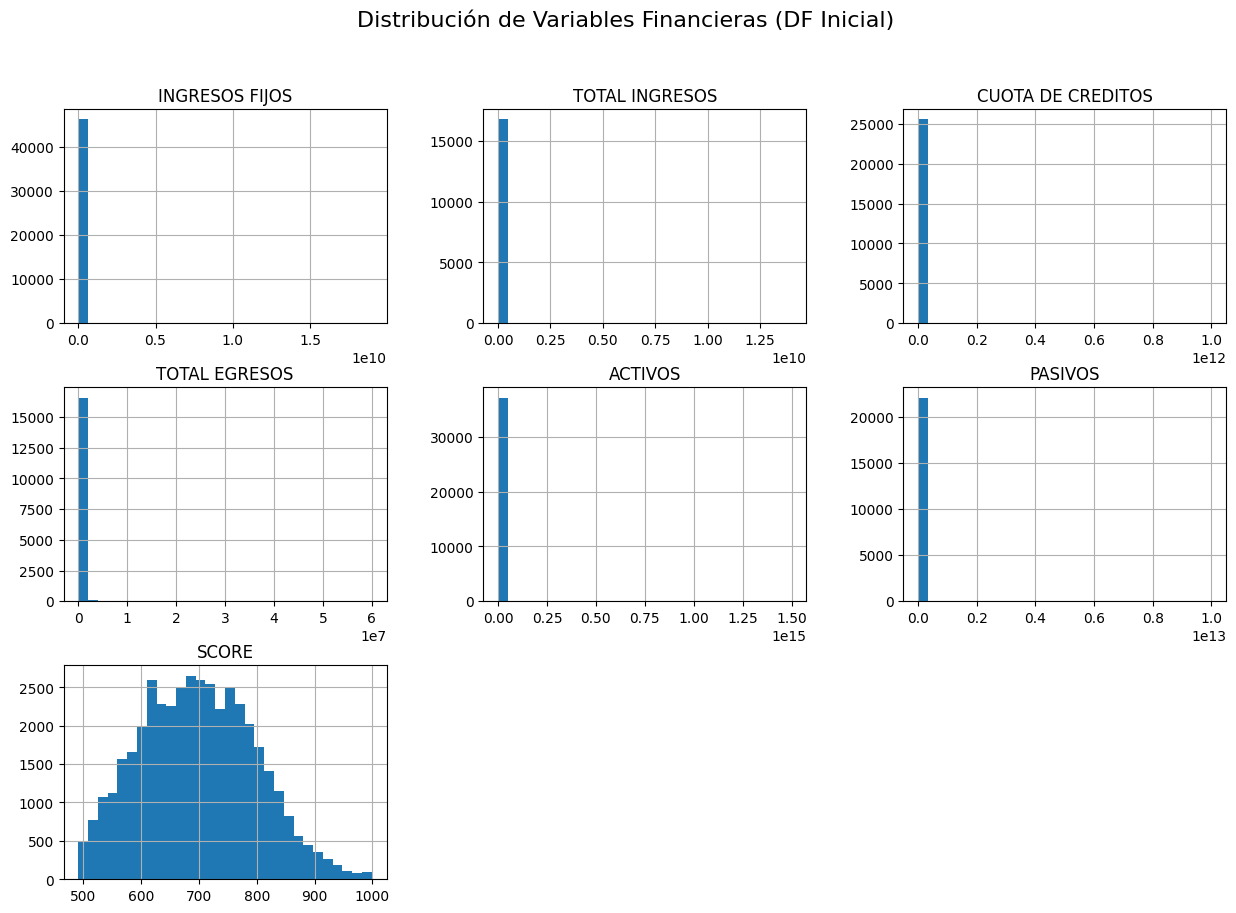

In [25]:
cols_numericas = ['INGRESOS FIJOS', 'TOTAL INGRESOS', 'CUOTA DE CREDITOS',
                  'TOTAL EGRESOS', 'ACTIVOS', 'PASIVOS', 'SCORE']

df[cols_numericas].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribución de Variables Financieras (DF Inicial)", fontsize=16)
plt.show()


#### Boxplots

In [26]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['TRANSACTION ID', 'NO PERSONAS A CARGO',
       'ANTIGUEDAD EN LA CIUDAD tiempo en residencia', 'ESTRATO',
       'INGRESOS FIJOS', 'OTROS INGRESOS', 'TOTAL INGRESOS',
       'CUOTA DE CREDITOS', 'GASTOS DE SOSTENIMIENTO', 'TOTAL EGRESOS',
       'ACTIVOS', 'PASIVOS', 'MONTO PREAPROBADO', 'NO CREDITO',
       'MONTO APROBADO', 'PLAZO', 'MONTO DESEMBOLSO',
       'IDENTIFICACION COMERCIAL', 'TASA', 'CUOTAMENSUAL', 'CODIGO CIIU',
       'SCORE', 'SEGURO', 'AVAL', 'CODIGO CONFIRMACION CREDITO', 'PAGARE_ID',
       'NUMERO CREDITO TESEO', 'SALDO CAPITAL', 'SALDO VENCIDO',
       'DIAS DE MORA ', 'EDAD'],
      dtype='object')

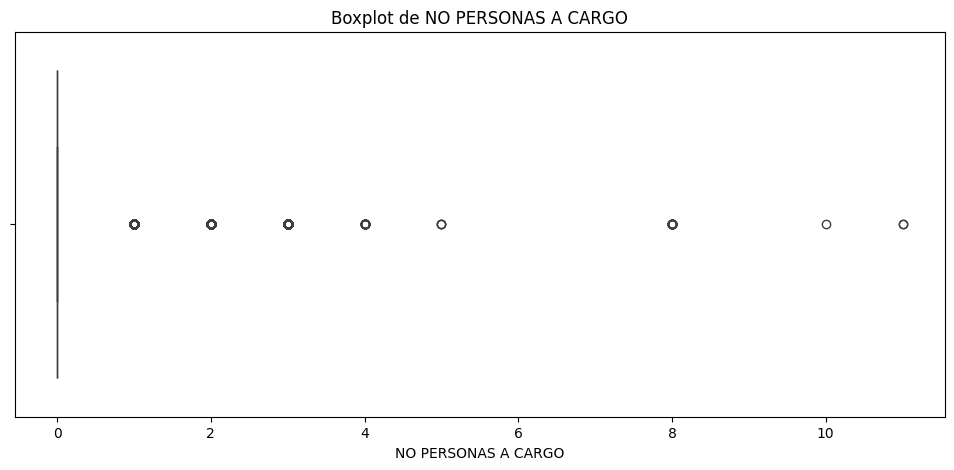

In [27]:
bxplt_var = 'NO PERSONAS A CARGO'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

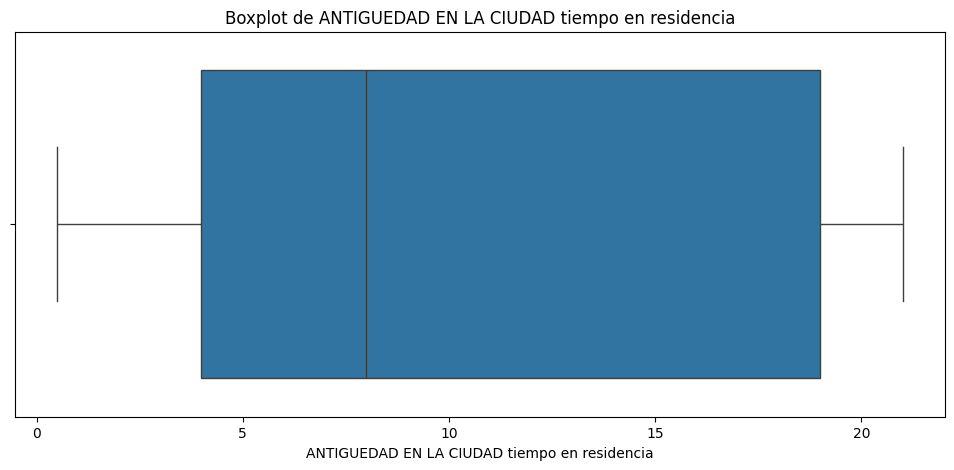

In [28]:
bxplt_var = 'ANTIGUEDAD EN LA CIUDAD tiempo en residencia'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

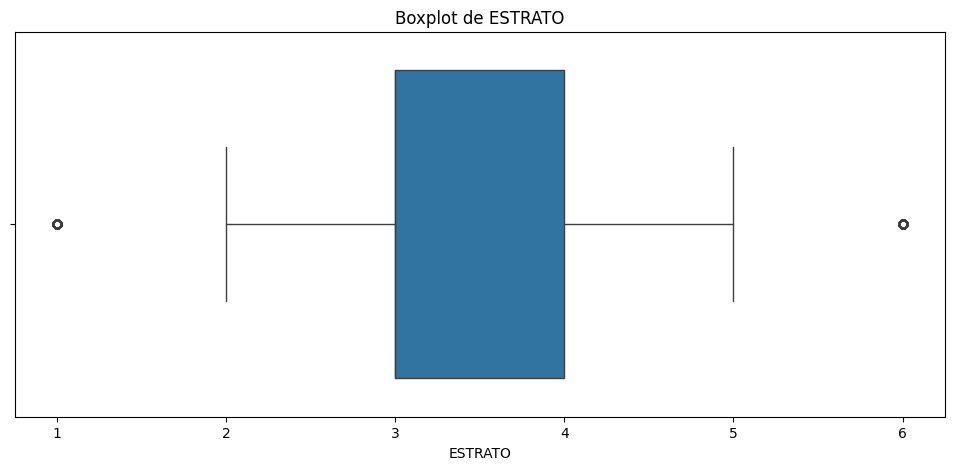

In [29]:
bxplt_var = 'ESTRATO'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

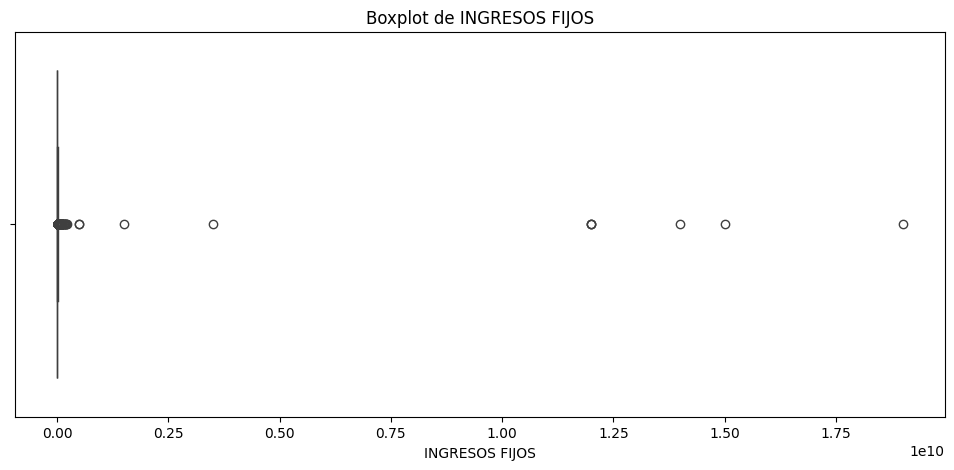

In [30]:
bxplt_var = 'INGRESOS FIJOS'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

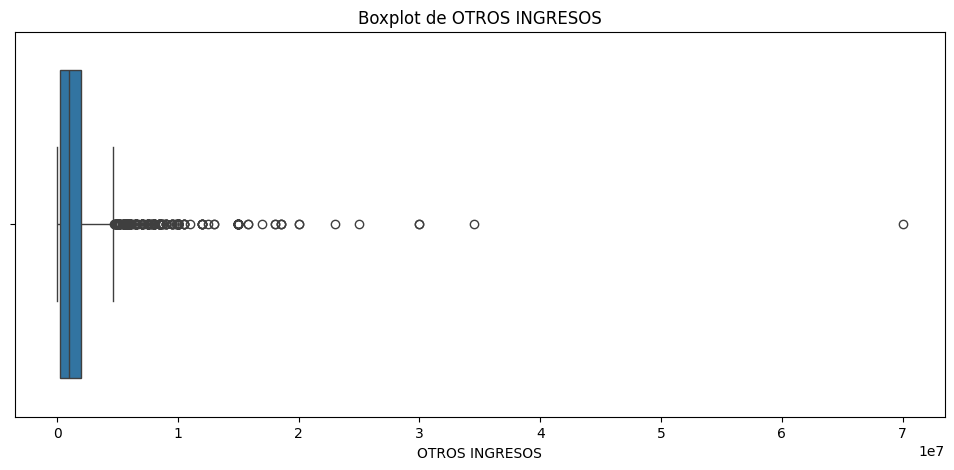

In [31]:
bxplt_var = 'OTROS INGRESOS'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

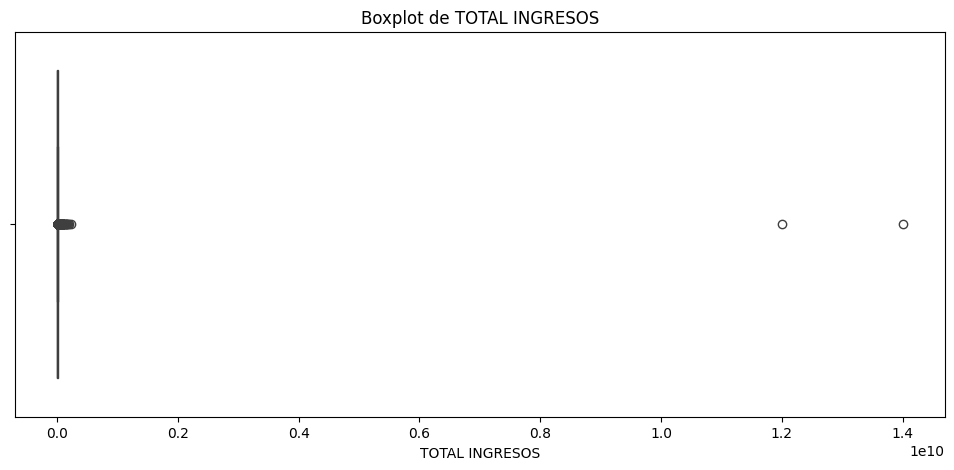

In [32]:
bxplt_var = 'TOTAL INGRESOS'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

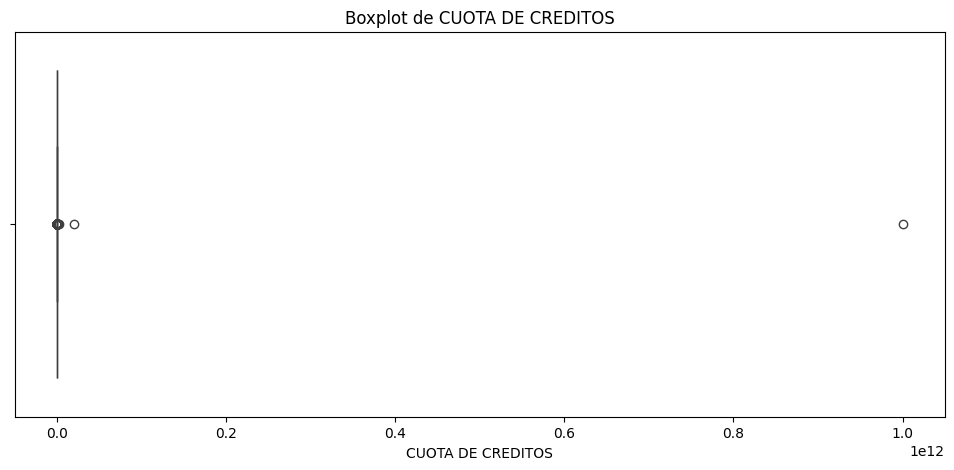

In [33]:
bxplt_var = 'CUOTA DE CREDITOS'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

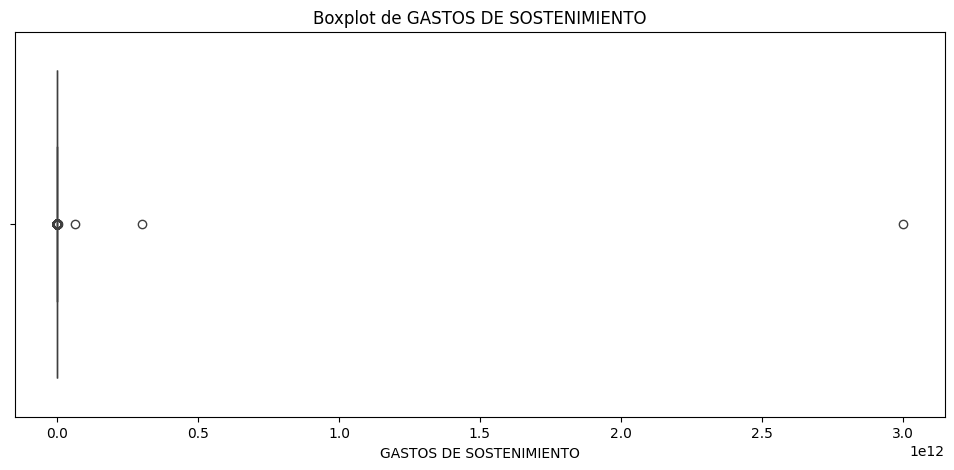

In [34]:
bxplt_var = 'GASTOS DE SOSTENIMIENTO'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

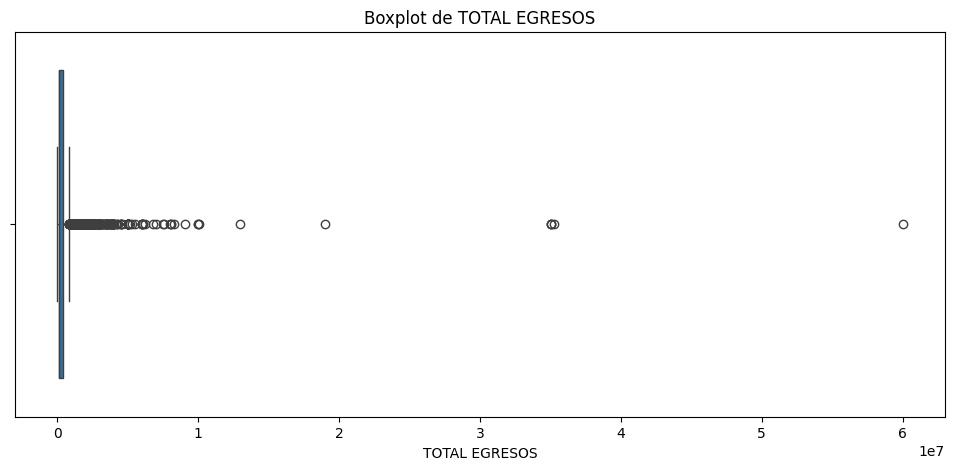

In [35]:
bxplt_var = 'TOTAL EGRESOS'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

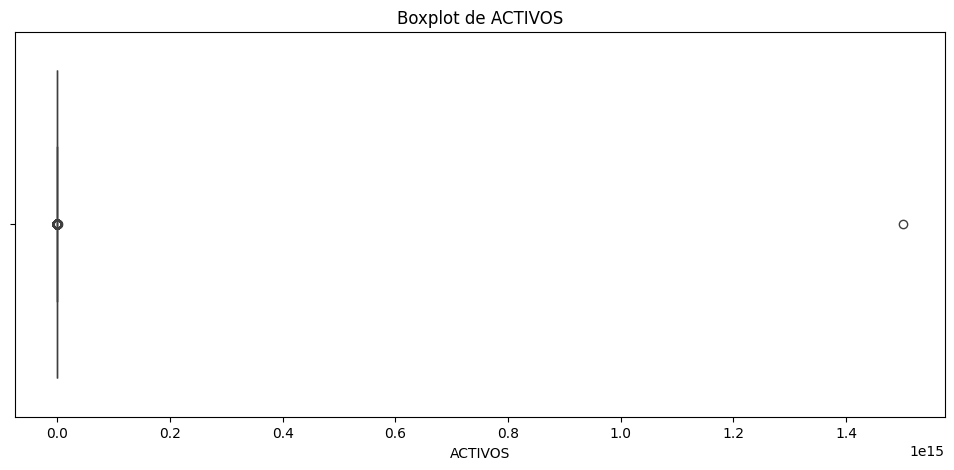

In [36]:
bxplt_var = 'ACTIVOS'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

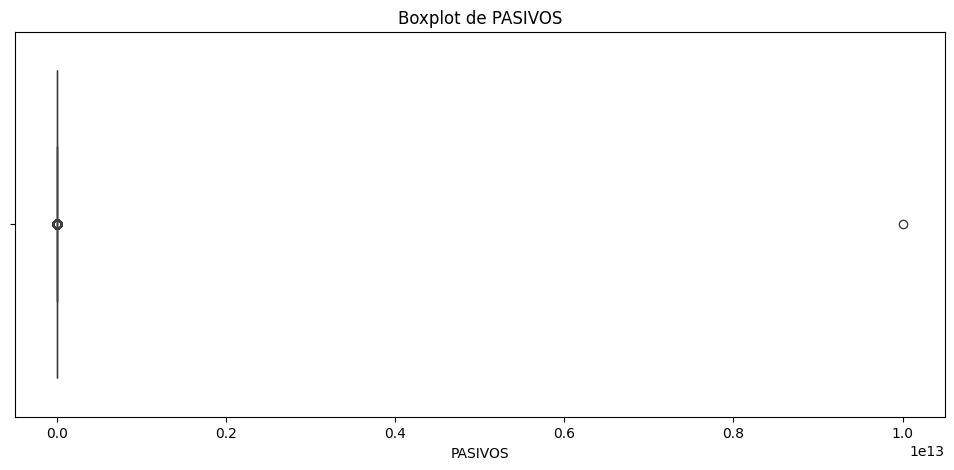

In [37]:
bxplt_var = 'PASIVOS'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

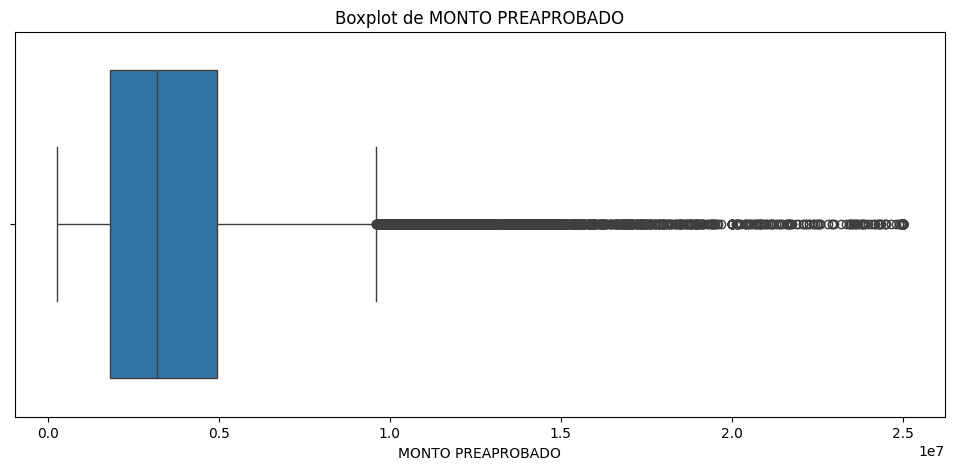

In [38]:
bxplt_var = 'MONTO PREAPROBADO'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

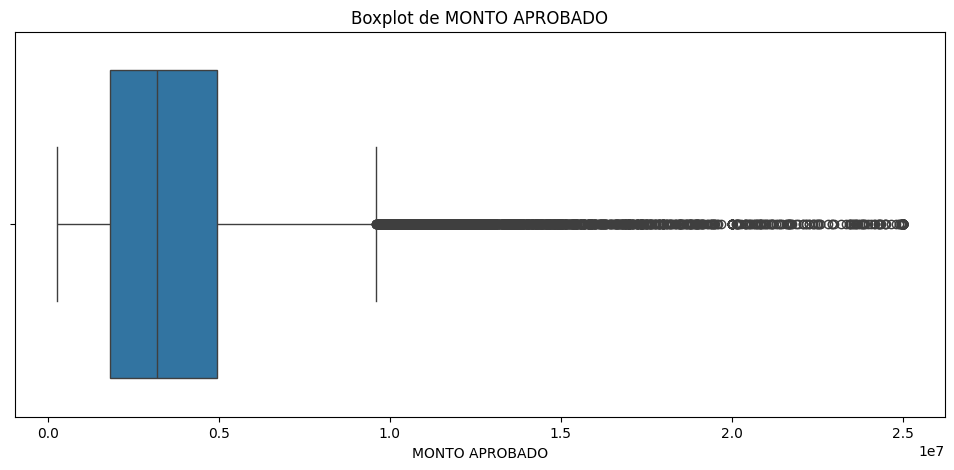

In [39]:
bxplt_var = 'MONTO APROBADO'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

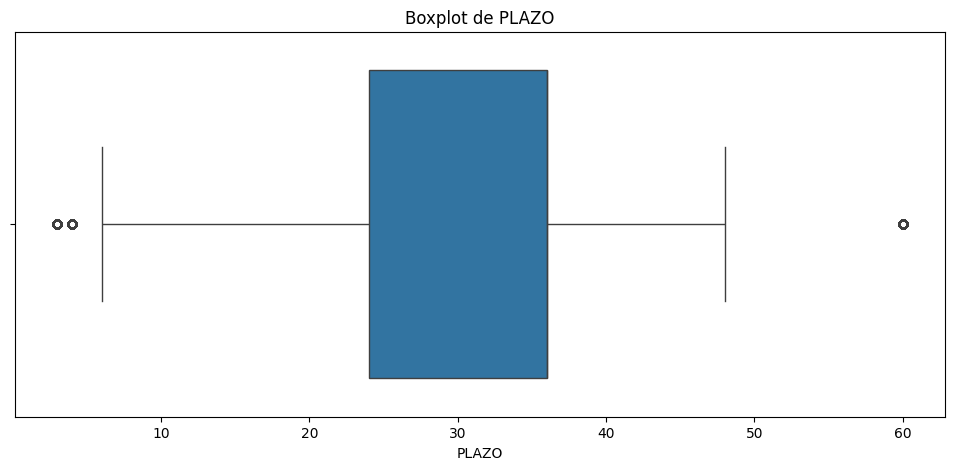

In [40]:
bxplt_var = 'PLAZO'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

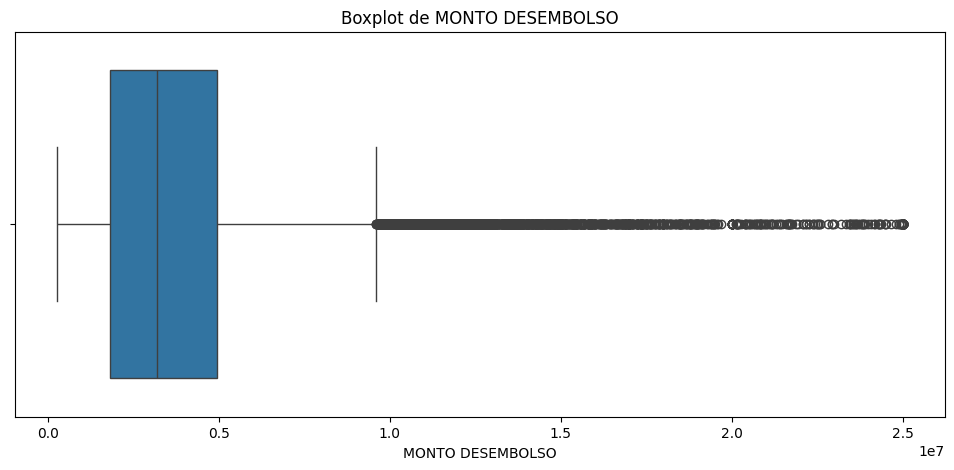

In [41]:
bxplt_var = 'MONTO DESEMBOLSO'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

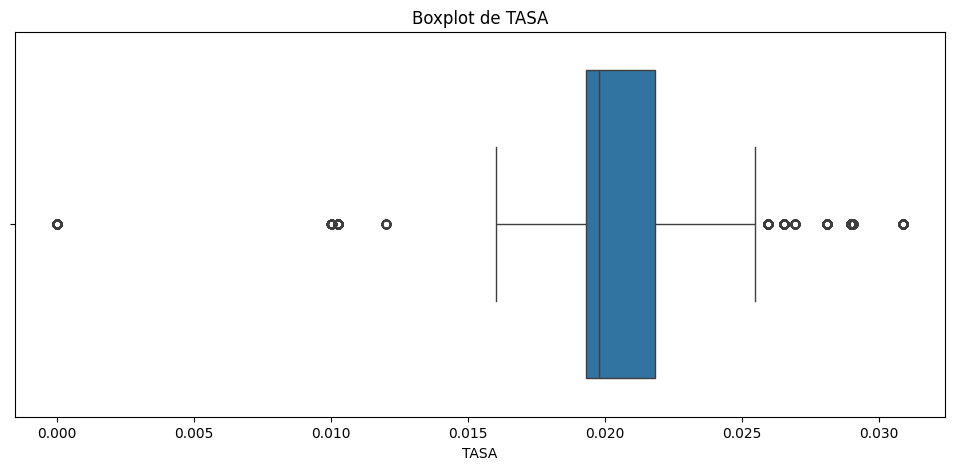

In [42]:
bxplt_var = 'TASA'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

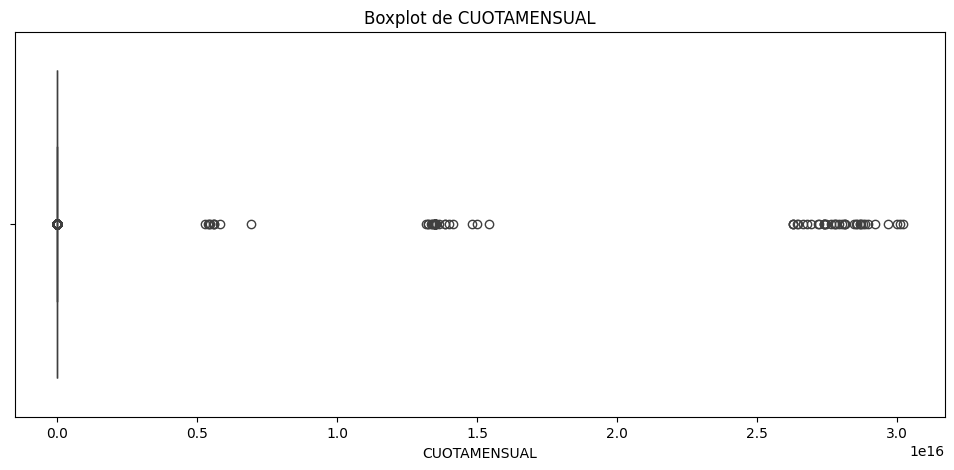

In [43]:
bxplt_var = 'CUOTAMENSUAL'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

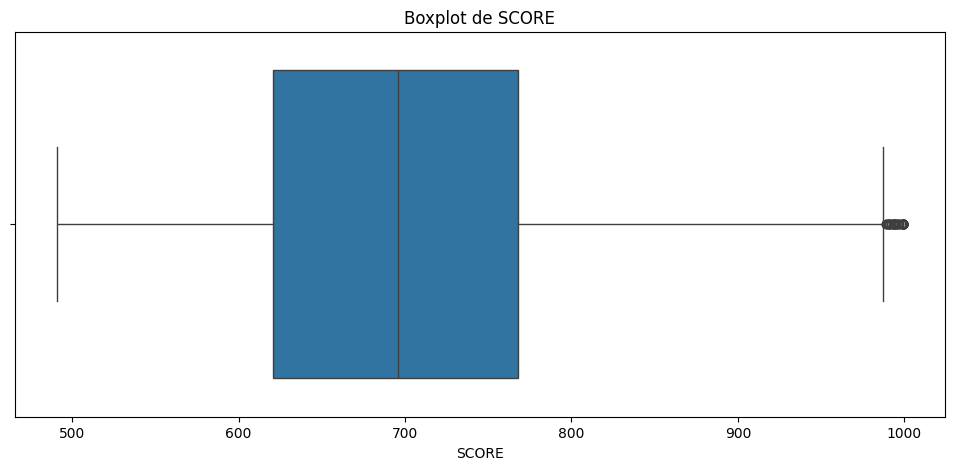

In [44]:
bxplt_var = 'SCORE'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

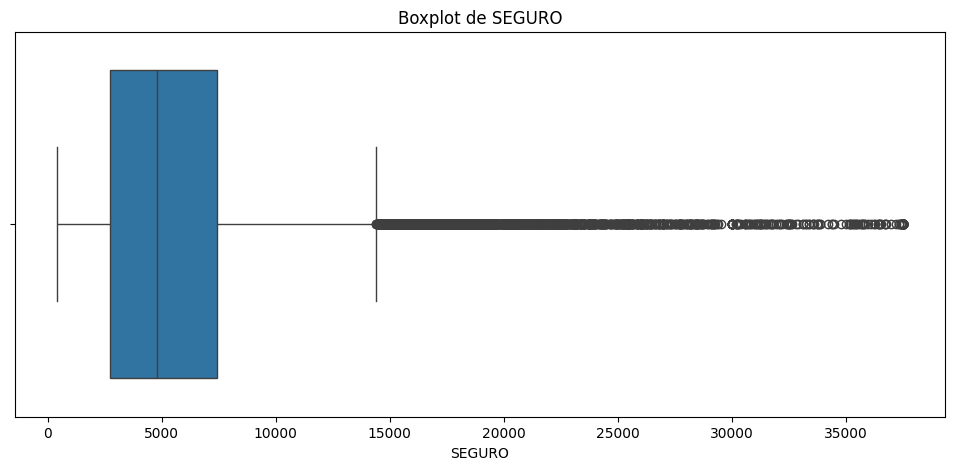

In [45]:
bxplt_var = 'SEGURO'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

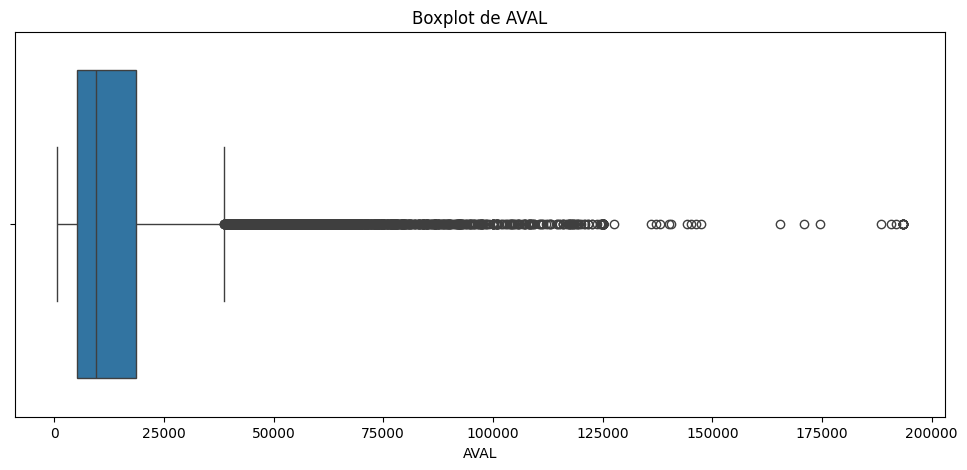

In [46]:
bxplt_var = 'AVAL'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

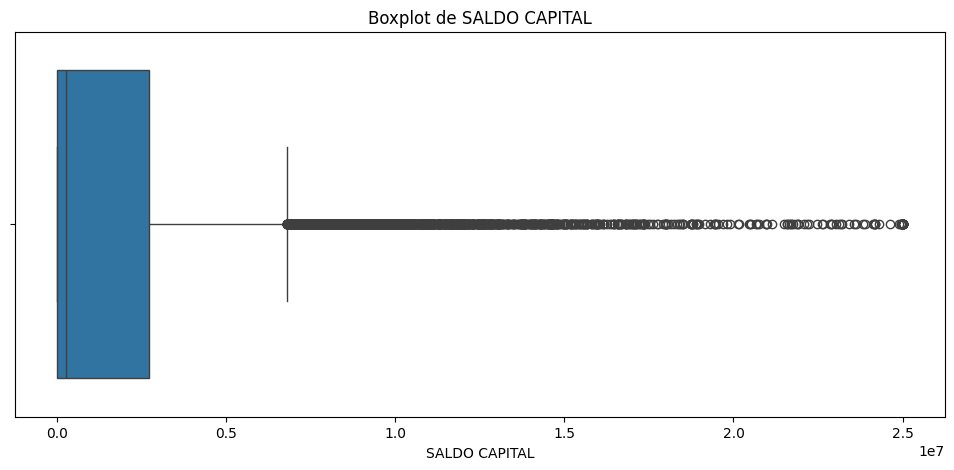

In [47]:
bxplt_var = 'SALDO CAPITAL'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

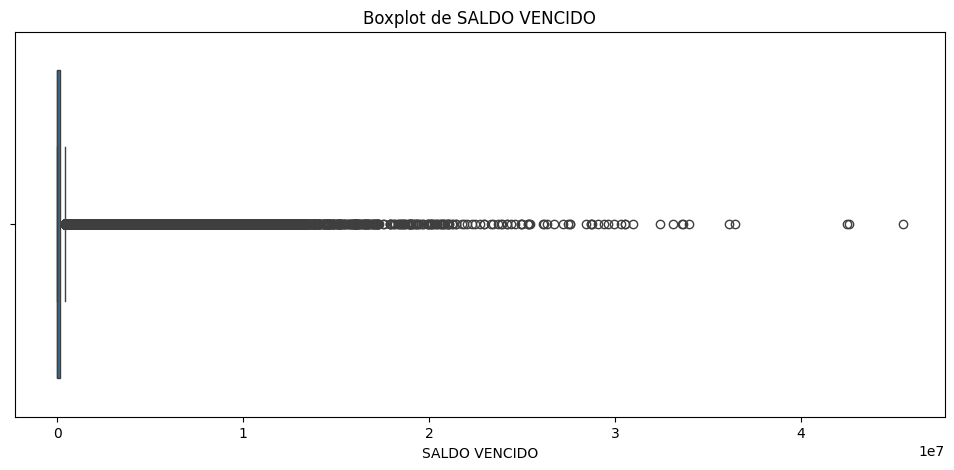

In [48]:
bxplt_var = 'SALDO VENCIDO'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

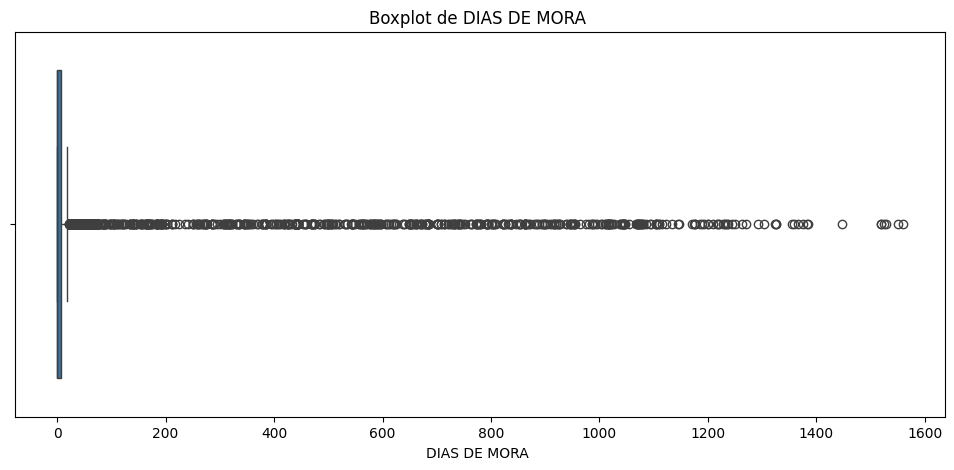

In [49]:
bxplt_var = 'DIAS DE MORA '
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

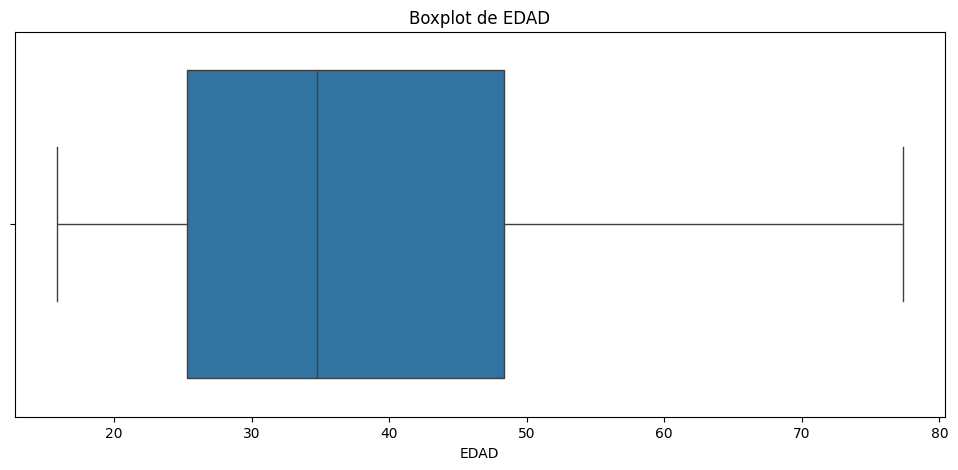

In [50]:
bxplt_var = 'EDAD'
plt.figure(figsize=(12,5))
sns.boxplot(x=df[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

#### Matriz de Correlación

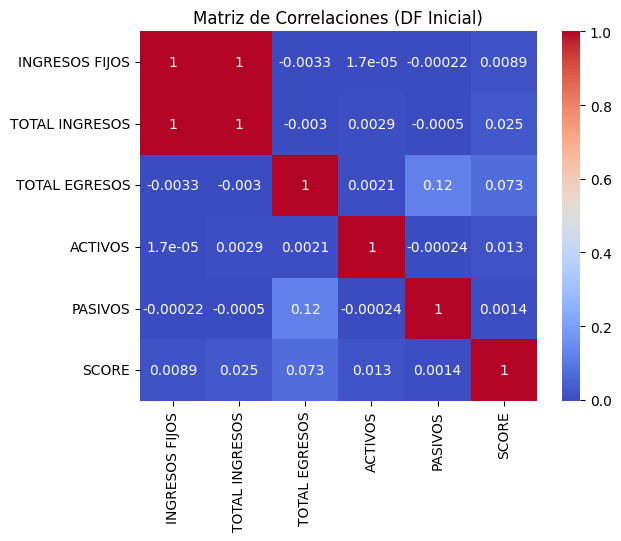

In [51]:
corr = df[['INGRESOS FIJOS', 'TOTAL INGRESOS', 'TOTAL EGRESOS', 
           'ACTIVOS', 'PASIVOS', 'SCORE']].corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlaciones (DF Inicial)")
plt.show()

## 3. Clasificación y Detección de Problemas de Calidad
---

### 3.1 Problemas de Fuente Única (errores de instancia)

En esta sección analizamos la consistencia de los identificadores que vinculan los créditos con la entidad comercial y la clínica donde se formalizan. Cada registro tiene los campos `IDENTIFICACION COMERCIAL`, `COMERCIAL`, `CLINICA` y `CODIGO CIIU`, que en teoría deberían mantener una correspondencia uno-a-uno: cada clínica o sucursal debería tener un identificador comercial único y un código CIIU asociado.

Sin embargo, antes de dividir el dataset en entidades lógicas (por ejemplo, una tabla COMERCIAL y otra CRÉDITO), necesitamos comprobar si esos códigos son realmente únicos o si presentan inconsistencias de naming.

In [52]:
print('Identificaciones comerciales únicas:', df['IDENTIFICACION COMERCIAL'].nunique())
print('Comerciales únicos:', df['COMERCIAL'].nunique())
print('Clínicas únicas:', df['CLINICA'].nunique())
print('Códigos CIIU únicos:', df['CODIGO CIIU'].nunique())

Identificaciones comerciales únicas: 542
Comerciales únicos: 724
Clínicas únicas: 52
Códigos CIIU únicos: 9


Los resultados muestran que existen 542 identificaciones comerciales distintas, pero 724 valores únicos en el campo COMERCIAL.
Esto sugiere un conflicto de naming o duplicidad: un mismo identificador comercial puede tener asociadas varias denominaciones de “comercial” aparentemente equivalentes (por ejemplo, colte_ccdentixbog007 y dentixbog007).

In [53]:
comercial_por_id = df.groupby('IDENTIFICACION COMERCIAL')['COMERCIAL'].nunique()

ids_con_multiples_comerciales = comercial_por_id[comercial_por_id > 1]
print('Identificaciones comerciales con más de un comercial:', len(ids_con_multiples_comerciales))
pd.set_option('display.max_rows', None)
print(df[df['IDENTIFICACION COMERCIAL'].isin(ids_con_multiples_comerciales.index)].groupby(['IDENTIFICACION COMERCIAL', 'COMERCIAL']).size().reset_index(name='TOTAL_REGISTROS'))

Identificaciones comerciales con más de un comercial: 179
     IDENTIFICACION COMERCIAL               COMERCIAL  TOTAL_REGISTROS
0                      530147    colte_ccdentixmde008                2
1                      530147            dentixmde008               29
2                     1731799    colte_ccdentixvvc002               80
3                     1731799            dentixvvc002              147
4                     7707114  colte_ccdentixneiva003                6
5                     7707114          dentixneiva003              189
6                     8102526       colte_ccragiraldo               26
7                     8102526               ragiraldo               79
8                    10291147    colte_ccdentixppn007                5
9                    10291147            dentixppn007               56
10                   13543577      colte_cceferrerira              209
11                   13543577              eferrerira              155
12                 

Con base en el patrón detectado, el siguiente paso es unificar los nombres comerciales duplicados. La idea es conservar el formato que ya contiene el prefijo corporativo (colte_ o colte_cc) y reemplazar las variantes más cortas o inconsistentes (dentixbog007, dvmarin, etc.) por su versión estandarizada.

In [54]:
tuplas_validas = df[df['IDENTIFICACION COMERCIAL'].isin(ids_con_multiples_comerciales.index)] \
    .groupby(['IDENTIFICACION COMERCIAL', 'COMERCIAL']) \
    .size() \
    .index

tuplas_validas = list(tuplas_validas)

def tiene_prefijo_valido(comercial):
    return re.match(r'^colte_', comercial) or re.match(r'^dentix_', comercial)

for comercial in df['COMERCIAL'].unique():
    if not tiene_prefijo_valido(comercial):
        
        for id_comercial, comercial_valido in tuplas_validas:
            if comercial == comercial_valido:
                
                candidatos = [c for (id_c, c) in tuplas_validas if id_c == id_comercial and tiene_prefijo_valido(c)]
                if candidatos:
                    reemplazo = candidatos[0]
                    df.loc[df['COMERCIAL'] == comercial, 'COMERCIAL'] = reemplazo
                    print(f'Reemplazado: {comercial} → {reemplazo}')
                break

Reemplazado: coltedentixbog038 → colte_ccdentixbog038
Reemplazado: coltespascuas → colte_spascuasl
Reemplazado: asguerrero → colte_ccasguerrero
Reemplazado: dentixvvc004 → colte_ccdentixvvc004
Reemplazado: lmposada → colte_cclmposada
Reemplazado: dentixbog086 → colte_ccdentixbog086
Reemplazado: kjcastilla → colte_kjcastilla
Reemplazado: datricia → colte_ccdatricia
Reemplazado: mjgallejo → colte_ccmjgallejo
Reemplazado: dentixibe003 → colte_ccdentixibe003
Reemplazado: dentixbog078 → colte_ccdentixbog078
Reemplazado: dcartagena → colte_ccdcartagena
Reemplazado: dentixmon003 → colte_ccdentixmon003
Reemplazado: dentixbog084 → colte_ccdentixbog084
Reemplazado: erig → colte_ccerig
Reemplazado: jcampuzano → colte_ccjcampuzano
Reemplazado: yjtejada → colte_ccyjtejada
Reemplazado: lguzman → colte_cclguzman
Reemplazado: dentixpso003 → colte_ccdentixpso003
Reemplazado: lcbernal → colte_lcbernal
Reemplazado: ebermeo → colte_ebermeo
Reemplazado: dentixbog074 → colte_ccdentixbog074
Reemplazado: dent

In [55]:
print('Identificaciones comerciales únicas:', df['IDENTIFICACION COMERCIAL'].nunique())
print('Comerciales únicos:', df['COMERCIAL'].nunique())

Identificaciones comerciales únicas: 542
Comerciales únicos: 540


In [56]:
comercial_por_clinica = df.groupby('IDENTIFICACION COMERCIAL')['CLINICA'].nunique()

comerciales_repetidos = comercial_por_clinica[comercial_por_clinica > 1]
print('Identificaciones comerciales en más de una clínica:', len(comerciales_repetidos))
comerciales_repetidos.head()

Identificaciones comerciales en más de una clínica: 193


IDENTIFICACION COMERCIAL
530147      2
1048199     5
8102526     2
9878294     2
10188027    2
Name: CLINICA, dtype: int64

In [57]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Configuración por defecto
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

df.groupby(['IDENTIFICACION COMERCIAL', 'CLINICA'])['TRANSACTION ID'].nunique()

IDENTIFICACION COMERCIAL  CLINICA                     
398942                    Dentix BOG Plaza Imperial       21
530147                    Dentix EOH Bello                19
                          Dentix EOH Nutibara Medellin    12
1048199                   Dentix BOG Cedritos - Bogotá     6
                          Dentix BOG Diverplaza            1
                                                          ..
10853063201               Dentix PSO Pasto                 4
10959238813               Dentix CUC Calle 13 Cúcuta       9
11306529151               Dentix CLO Imbanaco             47
11440647141               Dentix CLO Cali Chipichape      11
904512230091988           Dentix BOG Galerias             29
Name: TRANSACTION ID, Length: 945, dtype: int64

In [58]:

print("Total de registros:", len(df))
print("Total de valores en 'NO CREDITO':", len(df['NO CREDITO']))
print("   → Nulos en 'NO CREDITO':", df['NO CREDITO'].isnull().sum())
print("   → Valores únicos en 'NO CREDITO':", df['NO CREDITO'].nunique())
print("Valores únicos en 'NUMERO CREDITO TESEO':", df['NUMERO CREDITO TESEO'].nunique())
print("Valores únicos en 'TRANSACTION ID':", df['TRANSACTION ID'].nunique())


Total de registros: 46327
Total de valores en 'NO CREDITO': 46327
   → Nulos en 'NO CREDITO': 1
   → Valores únicos en 'NO CREDITO': 31203
Valores únicos en 'NUMERO CREDITO TESEO': 46327
Valores únicos en 'TRANSACTION ID': 46327


### 3.2 Categorización por Nivel

In [59]:
df_incons = df[df['TOTAL EGRESOS'] > df['TOTAL INGRESOS']]
print(f"Inconsistencias ingreso-egreso: {df_incons.shape[0]}")

Inconsistencias ingreso-egreso: 8


In [60]:
df_incons

,TRANSACTION ID,FECHA NACIMIENTO,FECHA EXP DOC,NIVEL ESTUDIOS,ESTADOCIVIL,PROFESION,GÉNERO,TIPO VIVIENDA,NO PERSONAS A CARGO,ANTIGUEDAD EN LA CIUDAD tiempo en residencia,...,AVAL,CODIGO CONFIRMACION CREDITO,PAGARE_ID,DESISTIMIENTO,NUMERO CREDITO TESEO,SALDO CAPITAL,SALDO VENCIDO,DIAS DE MORA,FRANJA DE MORA,EDAD
452,2001950,1971-05-23 00:00:00,1990-12-28 00:00:00,Técnico,Soltero (a),Comerciante,F,Familiar,0.0,1.0,...,77349,58812560,39724754.0,NaN,58812560,14569560,0.00,0,01. Al dia,54.035616
1321,1970028,1961-04-06 00:00:00,1979-06-25 05:00:00,Tecnólogo,Unión libre,Operador,M,Propia,0.0,21.0,...,14386,16157126,38468743.0,16157126,16157126,2275165,0.00,0,01. Al dia,64.000000
1576,1960799,1981-03-23 00:00:00,1999-09-03 05:00:00,Tecnólogo,Soltero (a),Administrador de Empresas,F,Propia,0.0,21.0,...,35180,4115349,38017278.0,NaN,4115349,6464116,0.00,8,02. 1 a 30,43.978082
2125,1938813,1968-03-24 05:00:00,1986-09-23 05:00:00,Licenciatura,Soltero (a),Administrador de Empresas,F,Familiar,0.0,2.0,...,30002,6165393,37174480.0,NaN,6165393,5238673,0.00,0,01. Al dia,56.873973
2324,1931534,1968-06-28 05:00:00,1986-10-21 00:00:00,Universitario,Soltero (a),Administrador de Empresas,F,Familiar,0.0,2.5,...,45406,26034355,36885386.0,NaN,26034355,9067200,4477480.18,64,04. 61 a 90,56.575342
3554,1861634,2001-10-11 00:00:00,2019-11-19 00:00:00,Universitario,Soltero (a),Administrador de Empresas,F,Familiar,0.0,1.0,...,26537,45684426,34625602.0,NaN,45684426,5307000,2481974.12,3,02. 1 a 30,22.923288
11090,1667527,1964-06-14 00:00:00,1982-09-16 19:00:00,Universitario,Casado (a),Administrador de Empresas,F,Familiar,1.0,2.0,...,15612,56803020,NaN,NaN,56803020,0,0.00,0,01. Al dia,59.257534
13390,1619188,1960-10-31 00:00:00,1979-08-27 19:00:00,Licenciatura,Soltero (a),Docente,M,Propia,0.0,21.0,...,5098,64931321,27091342.0,NaN,64931321,307250,67646.80,49,03. 31 a 60,62.605479


In [61]:
cols_one_value = [c for c in df.columns if df[c].nunique() == 1]
cols_one_value

['FINANCIERA']

## 4. Manejo de Valores Faltantes
---

### 4.1 Tipos de Valores Faltantes (MCAR, MAR, MNAR)

| Tipo                                    | Significado                                     | Ejemplo en tu dataset                                         | Qué hacer                                  |
| --------------------------------------- | ----------------------------------------------- | ------------------------------------------------------------- | ------------------------------------------ |
| **MCAR (Missing Completely at Random)** | Faltan al azar; no dependen de otras variables. | Falta de `ESTADOCIVIL` por error humano aleatorio.            | Puedes eliminar filas o imputar simple.    |
| **MAR (Missing at Random)**             | La ausencia depende de otra variable.           | `OTROS INGRESOS` falta más cuando `OCUPACIÓN = Estudiante`.   | Usa imputación condicional o MICE.         |
| **MNAR (Missing Not at Random)**        | La ausencia depende del propio valor faltante.  | Personas con `GASTOS DE SOSTENIMIENTO` altos no los declaran. | No imputar a ciegas; investigar o modelar. |


In [62]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False).head(25)

FINANCIERA                                      99.997841
DESISTIMIENTO                                   99.678373
OTROS INGRESOS                                  79.139595
TOTAL INGRESOS                                  63.787856
TOTAL EGRESOS                                   63.787856
OPERACION MONEDA EXTRAGERA                      58.911650
NO PERSONAS A CARGO                             52.427310
PASIVOS                                         52.265418
CUOTA DE CREDITOS                               44.870162
ACTIVOS                                         19.718523
SCORE                                            8.716299
GÉNERO                                           2.564379
PAGARE_ID                                        1.163468
GASTOS DE SOSTENIMIENTO                          0.967039
EMPRESA                                          0.395018
TIPO CONTRATO                                    0.004317
ACTIVIDAD ECONÓMICA                              0.004317
TIPO VIVIENDA 

#### Función Modular para Análisis de Patrones Faltantes.

In [63]:
def compare_missing_patterns(df, col, threshold_std=2.5, top_n=10):
    if col not in df.columns:
        raise ValueError(f"La columna '{col}' no existe en el DataFrame.")
    
    mask_missing = df[col].isnull()
    num_missing = mask_missing.sum()
    if num_missing == 0:
        print(f"No hay valores faltantes en '{col}'.")
        return None

    # --- 1. Mostrar resumen básico ---
    print(f"\n📊 Comparación para columna: {col}")
    print(f"- Filas con valores faltantes: {num_missing} ({100*num_missing/len(df):.2f}%)")

    # --- 2. Analizar si los faltantes se agrupan con otros faltantes ---
    other_cols = [c for c in df.columns if c != col]
    pct_missing_with = df.loc[~mask_missing, other_cols].isnull().mean().mean() * 100
    pct_missing_without = df.loc[mask_missing, other_cols].isnull().mean().mean() * 100
    diff_missing = pct_missing_without - pct_missing_with

    print(f"- Porcentaje promedio de nulos en otras columnas:")
    print(f"    Con {col} válidos: {pct_missing_with:.2f}%")
    print(f"    Con {col} faltantes: {pct_missing_without:.2f}%")
    print(f"    ↑ Diferencia: {diff_missing:+.2f} puntos\n")

    # --- 3. Comparación de medias numéricas ---
    num_cols = df.select_dtypes(include=np.number).columns.drop(col, errors='ignore')
    
    mean_missing = df.loc[mask_missing, num_cols].mean()
    mean_not_missing = df.loc[~mask_missing, num_cols].mean()
    
    std_all = df[num_cols].std()
    
    diff_std = ((mean_not_missing - mean_missing).abs() / std_all).sort_values(ascending=False)
    
    result = pd.DataFrame({
        "other_col": diff_std.index,
        "mean_missing": mean_missing.values,
        "mean_not_missing": mean_not_missing.values,
        "diff_std": diff_std.values
    })
    
    result["flag_strong_diff"] = result["diff_std"] > threshold_std
    result = result.head(top_n)

    # --- 4. Interpretación rápida ---
    if diff_missing > 10:
        print("👉 Los faltantes parecen agruparse con otros nulos (posible MAR).")
    elif diff_missing > 3:
        print("⚠️ Leve tendencia a agruparse; revisar columnas con alta correlación de nulos.")
    else:
        print("✅ No hay evidencia de agrupamiento; los faltantes parecen MCAR.\n")
    
    return result

#### A. TOTAL INGRESOS

In [64]:
res_total_ingresos = compare_missing_patterns(df, "TOTAL INGRESOS", threshold_std=2.5)
res_total_ingresos


📊 Comparación para columna: TOTAL INGRESOS
- Filas con valores faltantes: 29551 (63.79%)
- Porcentaje promedio de nulos en otras columnas:
    Con TOTAL INGRESOS válidos: 4.48%
    Con TOTAL INGRESOS faltantes: 13.26%
    ↑ Diferencia: +8.77 puntos

⚠️ Leve tendencia a agruparse; revisar columnas con alta correlación de nulos.


,other_col,mean_missing,mean_not_missing,diff_std,flag_strong_diff
0,TRANSACTION ID,1.330824e+06,1.752467e+06,1.864695,False
1,PAGARE_ID,7.708531e-01,8.369099e-02,1.863929,False
2,NO PERSONAS A CARGO,9.858235e+00,1.093007e+01,1.085721,False
3,AVAL,3.199228e+00,3.411481e+00,1.025428,False
4,NO CREDITO,6.147970e+06,8.523142e+06,0.946804,False
5,TASA,NaN,1.599688e+06,0.862963,False
6,SALDO CAPITAL,1.168026e+08,6.761562e+04,0.549587,False
7,PLAZO,1.160871e+08,2.596561e+05,0.478189,False
8,MONTO APROBADO,NaN,3.272717e+05,0.395562,False
9,MONTO DESEMBOLSO,7.383306e+10,1.285749e+08,0.395483,False


#### B. TOTAL EGRESOS

In [65]:
res_total_egresos = compare_missing_patterns(df, "TOTAL EGRESOS", threshold_std=2.5)
res_total_egresos


📊 Comparación para columna: TOTAL EGRESOS
- Filas con valores faltantes: 29551 (63.79%)
- Porcentaje promedio de nulos en otras columnas:
    Con TOTAL EGRESOS válidos: 4.48%
    Con TOTAL EGRESOS faltantes: 13.26%
    ↑ Diferencia: +8.77 puntos

⚠️ Leve tendencia a agruparse; revisar columnas con alta correlación de nulos.


,other_col,mean_missing,mean_not_missing,diff_std,flag_strong_diff
0,TRANSACTION ID,1.330824e+06,1.752467e+06,1.864695,False
1,PAGARE_ID,7.708531e-01,8.369099e-02,1.863929,False
2,NO PERSONAS A CARGO,9.858235e+00,1.093007e+01,1.085721,False
3,AVAL,3.199228e+00,3.411481e+00,1.025428,False
4,NO CREDITO,6.147970e+06,8.523142e+06,0.946804,False
5,TASA,NaN,1.599688e+06,0.862963,False
6,SALDO CAPITAL,NaN,9.444660e+06,0.549587,False
7,PLAZO,1.168026e+08,6.761562e+04,0.478189,False
8,MONTO APROBADO,1.160871e+08,2.596561e+05,0.395562,False
9,MONTO DESEMBOLSO,7.383306e+10,1.285749e+08,0.395483,False


#### C. OPERACION MONEDA EXTRAGERA

In [66]:
res_moneda_extragera = compare_missing_patterns(df, "OPERACION MONEDA EXTRAGERA", threshold_std=2.5)
res_moneda_extragera


📊 Comparación para columna: OPERACION MONEDA EXTRAGERA
- Filas con valores faltantes: 27292 (58.91%)
- Porcentaje promedio de nulos en otras columnas:
    Con OPERACION MONEDA EXTRAGERA válidos: 5.04%
    Con OPERACION MONEDA EXTRAGERA faltantes: 13.74%
    ↑ Diferencia: +8.70 puntos

⚠️ Leve tendencia a agruparse; revisar columnas con alta correlación de nulos.


,other_col,mean_missing,mean_not_missing,diff_std,flag_strong_diff
0,NO PERSONAS A CARGO,1.319001e+06,1.719379e+06,1.876390,False
1,PAGARE_ID,1.271829e+00,8.424542e-02,1.780054,False
2,TRANSACTION ID,9.826232e+00,1.084881e+01,1.770654,False
3,NO CREDITO,3.185849e+00,3.405485e+00,1.015894,False
4,AVAL,5.734847e+06,8.833735e+06,0.973421,False
5,TASA,1.000000e+06,1.599750e+06,0.685560,False
6,SALDO CAPITAL,3.500000e+06,9.445014e+06,0.502563,False
7,PLAZO,1.567829e+08,6.908847e+04,0.432160,False
8,NUMERO CREDITO TESEO,1.258071e+08,2.782439e+05,0.365450,False
9,MONTO APROBADO,3.000000e+05,3.272733e+05,0.331794,False


#### D. NO PERSONAS A CARGO

In [67]:
res_personas_cargo = compare_missing_patterns(df, "NO PERSONAS A CARGO", threshold_std=2.5)
res_personas_cargo


📊 Comparación para columna: NO PERSONAS A CARGO
- Filas con valores faltantes: 24288 (52.43%)
- Porcentaje promedio de nulos en otras columnas:
    Con NO PERSONAS A CARGO válidos: 6.21%
    Con NO PERSONAS A CARGO faltantes: 13.96%
    ↑ Diferencia: +7.75 puntos

⚠️ Leve tendencia a agruparse; revisar columnas con alta correlación de nulos.


,other_col,mean_missing,mean_not_missing,diff_std,flag_strong_diff
0,TRANSACTION ID,1.321967e+06,1.661538e+06,1.501738,False
1,PAGARE_ID,9.937005e+00,1.058731e+01,1.500521,False
2,NO CREDITO,3.227250e+00,3.329915e+00,0.875515,False
3,AVAL,6.007910e+06,8.110289e+06,0.837154,False
4,TASA,NaN,1.599688e+06,0.599236,False
5,SALDO CAPITAL,NaN,9.444660e+06,0.429129,False
6,PLAZO,1.799529e+08,7.959107e+04,0.332032,False
7,MONTO APROBADO,1.385204e+08,3.260453e+06,0.278755,False
8,MONTO DESEMBOLSO,NaN,3.272717e+05,0.278673,False
9,SEGURO,9.347516e+10,1.464678e+08,0.278648,False


#### E. PASIVOS

In [68]:
res_pasivos = compare_missing_patterns(df, "PASIVOS", threshold_std=2.5)
res_pasivos


📊 Comparación para columna: PASIVOS
- Filas con valores faltantes: 24213 (52.27%)
- Porcentaje promedio de nulos en otras columnas:
    Con PASIVOS válidos: 6.08%
    Con PASIVOS faltantes: 14.11%
    ↑ Diferencia: +8.03 puntos

⚠️ Leve tendencia a agruparse; revisar columnas con alta correlación de nulos.


,other_col,mean_missing,mean_not_missing,diff_std,flag_strong_diff
0,NO PERSONAS A CARGO,1.318939e+06,1.663701e+06,1.842080,False
1,PAGARE_ID,1.280876e+00,1.150084e-01,1.527947,False
2,TRANSACTION ID,9.953600e+00,1.056694e+01,1.524695,False
3,NO CREDITO,3.157903e+00,3.405490e+00,0.885475,False
4,AVAL,5.877852e+06,8.245554e+06,0.851894,False
5,TASA,NaN,1.599688e+06,0.586064,False
6,SALDO CAPITAL,NaN,9.444660e+06,0.427267,False
7,PLAZO,2.222867e+08,8.735819e+04,0.345871,False
8,MONTO APROBADO,1.415705e+08,2.961734e+05,0.312598,False
9,SEGURO,NaN,3.272717e+05,0.312531,False


#### F. CUOTA DE CREDITOS

In [69]:
res_cuota_creditos = compare_missing_patterns(df, "CUOTA DE CREDITOS", threshold_std=2.5)
res_cuota_creditos


📊 Comparación para columna: CUOTA DE CREDITOS
- Filas con valores faltantes: 20787 (44.87%)
- Porcentaje promedio de nulos en otras columnas:
    Con CUOTA DE CREDITOS válidos: 7.25%
    Con CUOTA DE CREDITOS faltantes: 14.28%
    ↑ Diferencia: +7.03 puntos

⚠️ Leve tendencia a agruparse; revisar columnas con alta correlación de nulos.


,other_col,mean_missing,mean_not_missing,diff_std,flag_strong_diff
0,NO PERSONAS A CARGO,1.313417e+06,1.621948e+06,1.788074,False
1,PAGARE_ID,1.267277e+00,1.355898e-01,1.377076,False
2,TRANSACTION ID,9.924662e+00,1.050821e+01,1.364463,False
3,NO CREDITO,3.128747e+00,3.396006e+00,0.768863,False
4,AVAL,6.145179e+06,7.710378e+06,0.750659,False
5,TASA,NaN,1.599688e+06,0.478859,False
6,SALDO CAPITAL,NaN,9.444660e+06,0.397042,False
7,NUMERO CREDITO TESEO,1.628259e+08,2.901136e+05,0.300103,False
8,PLAZO,NaN,3.272717e+05,0.297545,False
9,MONTO APROBADO,1.118690e+11,2.155567e+08,0.297383,False


#### G. ACTIVOS

In [70]:
res_activos = compare_missing_patterns(df, "ACTIVOS", threshold_std=2.5)
res_activos


📊 Comparación para columna: ACTIVOS
- Filas con valores faltantes: 9135 (19.72%)
- Porcentaje promedio de nulos en otras columnas:
    Con ACTIVOS válidos: 9.77%
    Con ACTIVOS faltantes: 15.18%
    ↑ Diferencia: +5.40 puntos

⚠️ Leve tendencia a agruparse; revisar columnas con alta correlación de nulos.


,other_col,mean_missing,mean_not_missing,diff_std,flag_strong_diff
0,NO PERSONAS A CARGO,1.312706e+06,1.525462e+06,1.766088,False
1,TRANSACTION ID,1.316719e+00,1.989467e-01,0.940904,False
2,PAGARE_ID,9.803449e+00,1.035516e+01,0.935952,False
3,NO CREDITO,2.953137e+00,3.355399e+00,0.540552,False
4,AVAL,5.135122e+06,7.468072e+06,0.529858,False
5,ESTRATO,NaN,1.599688e+06,0.387787,False
6,TASA,NaN,9.444660e+06,0.342371,False
7,PLAZO,5.692358e+08,1.029676e+05,0.288774,False
8,NUMERO CREDITO TESEO,3.766190e+08,2.970757e+05,0.279256,False
9,SALDO CAPITAL,NaN,3.272717e+05,0.235394,False


#### H. SCORE

In [71]:
res_score = compare_missing_patterns(df, "SCORE", threshold_std=2.5)
res_score


📊 Comparación para columna: SCORE
- Filas con valores faltantes: 4038 (8.72%)
- Porcentaje promedio de nulos en otras columnas:
    Con SCORE válidos: 11.05%
    Con SCORE faltantes: 10.80%
    ↑ Diferencia: -0.25 puntos

✅ No hay evidencia de agrupamiento; los faltantes parecen MCAR.



,other_col,mean_missing,mean_not_missing,diff_std,flag_strong_diff
0,MONTO APROBADO,1.492524e+06,1.482649e+06,1.052283,False
1,SEGURO,9.139785e-02,2.637923e-01,1.052268,False
2,MONTO PREAPROBADO,9.598465e+00,1.030826e+01,1.052267,False
3,MONTO DESEMBOLSO,3.122585e+00,3.290751e+00,1.052241,False
4,AVAL,6.907048e+06,7.017738e+06,0.800408,False
5,EDAD,1.312112e+06,1.624164e+06,0.749498,False
6,SALDO CAPITAL,1.475878e+07,8.969840e+06,0.494595,False
7,PLAZO,4.144389e+04,4.407869e+07,0.449486,False
8,TASA,2.221901e+05,8.076876e+07,0.429921,False
9,DIAS DE MORA,2.307247e+05,3.358982e+05,0.354933,False


#### I. GÉNERO

In [72]:
res_genero = compare_missing_patterns(df, "GÉNERO", threshold_std=2.5)
res_genero


📊 Comparación para columna: GÉNERO
- Filas con valores faltantes: 1188 (2.56%)
- Porcentaje promedio de nulos en otras columnas:
    Con GÉNERO válidos: 11.32%
    Con GÉNERO faltantes: 4.29%
    ↑ Diferencia: -7.02 puntos

✅ No hay evidencia de agrupamiento; los faltantes parecen MCAR.



,other_col,mean_missing,mean_not_missing,diff_std,flag_strong_diff
0,TRANSACTION ID,1.805358e+06,1.475039e+06,1.460820,False
1,PAGARE_ID,9.006734e-02,2.567743e-01,1.440778,False
2,TASA,1.099150e+01,1.022678e+01,1.092895,False
3,AVAL,3.440236e+00,3.271773e+00,0.693161,False
4,NO CREDITO,7.038688e+06,7.007284e+06,0.484569,False
5,SALDO CAPITAL,1.572323e+06,1.601795e+06,0.450292,False
6,PLAZO,7.953230e+06,9.558325e+06,0.447623,False
7,MONTO APROBADO,6.817228e+04,4.207915e+07,0.369436,False
8,MONTO DESEMBOLSO,2.279948e+05,7.568793e+07,0.369376,False
9,SEGURO,2.961671e+05,3.296423e+05,0.369359,False


### 4.2 Métodos Básicos

#### A. Eliminación
Para variables con >70% faltantes.

In [73]:
df = df.drop(columns=["DESISTIMIENTO", "FINANCIERA", "OTROS INGRESOS"])

In [74]:
df = df.dropna(thresh=50)

A partir de la evaluación empírica realizada con la función `compare_missing_patterns`, se observó que la mayoría de las variables presentan diferencias menores al 3 % en el porcentaje promedio de nulos entre los registros con y sin valores faltantes, lo que indica que estos casos son **MCAR (Missing Completely at Random)** y, por tanto, su ausencia no depende de otras variables del conjunto de datos. Únicamente algunas variables mostraron una leve tendencia a agrupamiento —entre `3 %` y `8 %`—, como `TOTAL INGRESOS`, `TOTAL EGRESOS`, `OPERACION MONEDA EXTRAGERA`, `NO PERSONAS A CARGO`, `PASIVOS` y `CUOTA DE CRÉDITOS`, las cuales podrían corresponder a un patrón **MAR (Missing At Random)**. 

Dado que el porcentaje general de valores faltantes es bajo (menor al 10 % en la mayoría de las variables), y que no se identificaron dependencias sistemáticas relevantes, **se decidió eliminar únicamente las filas con valores faltantes en columnas no críticas**, manteniendo intactas aquellas con alta proporción de nulos para ser tratadas posteriormente mediante técnicas de imputación específicas.

In [81]:
cols_excluir = [
    "FINANCIERA", "DESISTIMIENTO", "OTROS INGRESOS", "TOTAL INGRESOS", 
    "TOTAL EGRESOS", "OPERACION MONEDA EXTRAGERA", "NO PERSONAS A CARGO", 
    "PASIVOS", "CUOTA DE CREDITOS", "ACTIVOS"
]

cols_para_drop = [c for c in df.columns if c not in cols_excluir]
df_clean = df.copy()
df_clean = df_clean.dropna(subset=cols_para_drop)

In [82]:
print(f"Filas originales: {len(df)}")
print(f"Filas después del dropna: {len(df_clean)}")
print(f"Filas eliminadas: {len(df) - len(df_clean)}")

Filas originales: 38386
Filas después del dropna: 34157
Filas eliminadas: 4229


#### B. Imputación Simple

In [85]:
df_clean["NO PERSONAS A CARGO"] = df_clean["NO PERSONAS A CARGO"].fillna(0)

In [86]:
df_clean['OPERACION MONEDA EXTRAGERA'] = df_clean['OPERACION MONEDA EXTRAGERA'].map({'True': True, 'False': False}).fillna(False)

C:\Users\kirad\AppData\Local\Temp\ipykernel_37848\3072882394.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['OPERACION MONEDA EXTRAGERA'] = df_clean['OPERACION MONEDA EXTRAGERA'].map({'True': True, 'False': False}).fillna(False)


### 4.3 Métodos Avanzados

#### A. Múltiple Imputación (MICE)

Ideal cuando tenemos varias variables numéricas correlacionadas (como las financieras); dado que se comporta como una serie de regresiones iterativas: cada variable faltante se predice usando las demás, la emplearemos en: TOTAL INGRESOS, TOTAL EGRESOS, ACTIVOS, PASIVOS, CUOTA DE CREDITOS.

La ventaja es que mantiene coherencia contable entre columnas, pero corremos el riesgo que requiere que no haya muchas columnas con >60% nulos (lo puedes limitar a las 5-6 más relacionadas).

📘 Justificación técnica:
Tienes correlaciones económicas claras (ACTIVOS ↔ PASIVOS, INGRESOS ↔ EGRESOS ↔ CUOTA),
y un patrón de nulos MAR leve (~6-8%), por lo que MICE mantiene las dependencias sin sobreajustar.

In [88]:
mice_cols = ["TOTAL EGRESOS", "PASIVOS", "CUOTA DE CREDITOS", "ACTIVOS"]
mice_imputer = IterativeImputer(random_state=42, max_iter=15)
df_clean[mice_cols] = mice_imputer.fit_transform(df_clean[mice_cols])

#### B. Imputación Random Forest

In [90]:
mask = df_clean["TOTAL INGRESOS"].notnull()
X_train = df_clean.loc[mask, ["INGRESOS FIJOS", "CUOTA DE CREDITOS", "ACTIVOS", "PASIVOS", "TOTAL EGRESOS"]]
y_train = df_clean.loc[mask, "TOTAL INGRESOS"]

rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=0)
rf.fit(X_train, y_train)

missing_mask = df["TOTAL INGRESOS"].isnull()
df_clean.loc[missing_mask, "TOTAL INGRESOS"] = rf.predict(
    df_clean.loc[missing_mask, ["INGRESOS FIJOS", "CUOTA DE CREDITOS", "ACTIVOS", "PASIVOS", "TOTAL EGRESOS"]]
)

### 4.4 Visualización

<Figure size 1200x600 with 0 Axes>

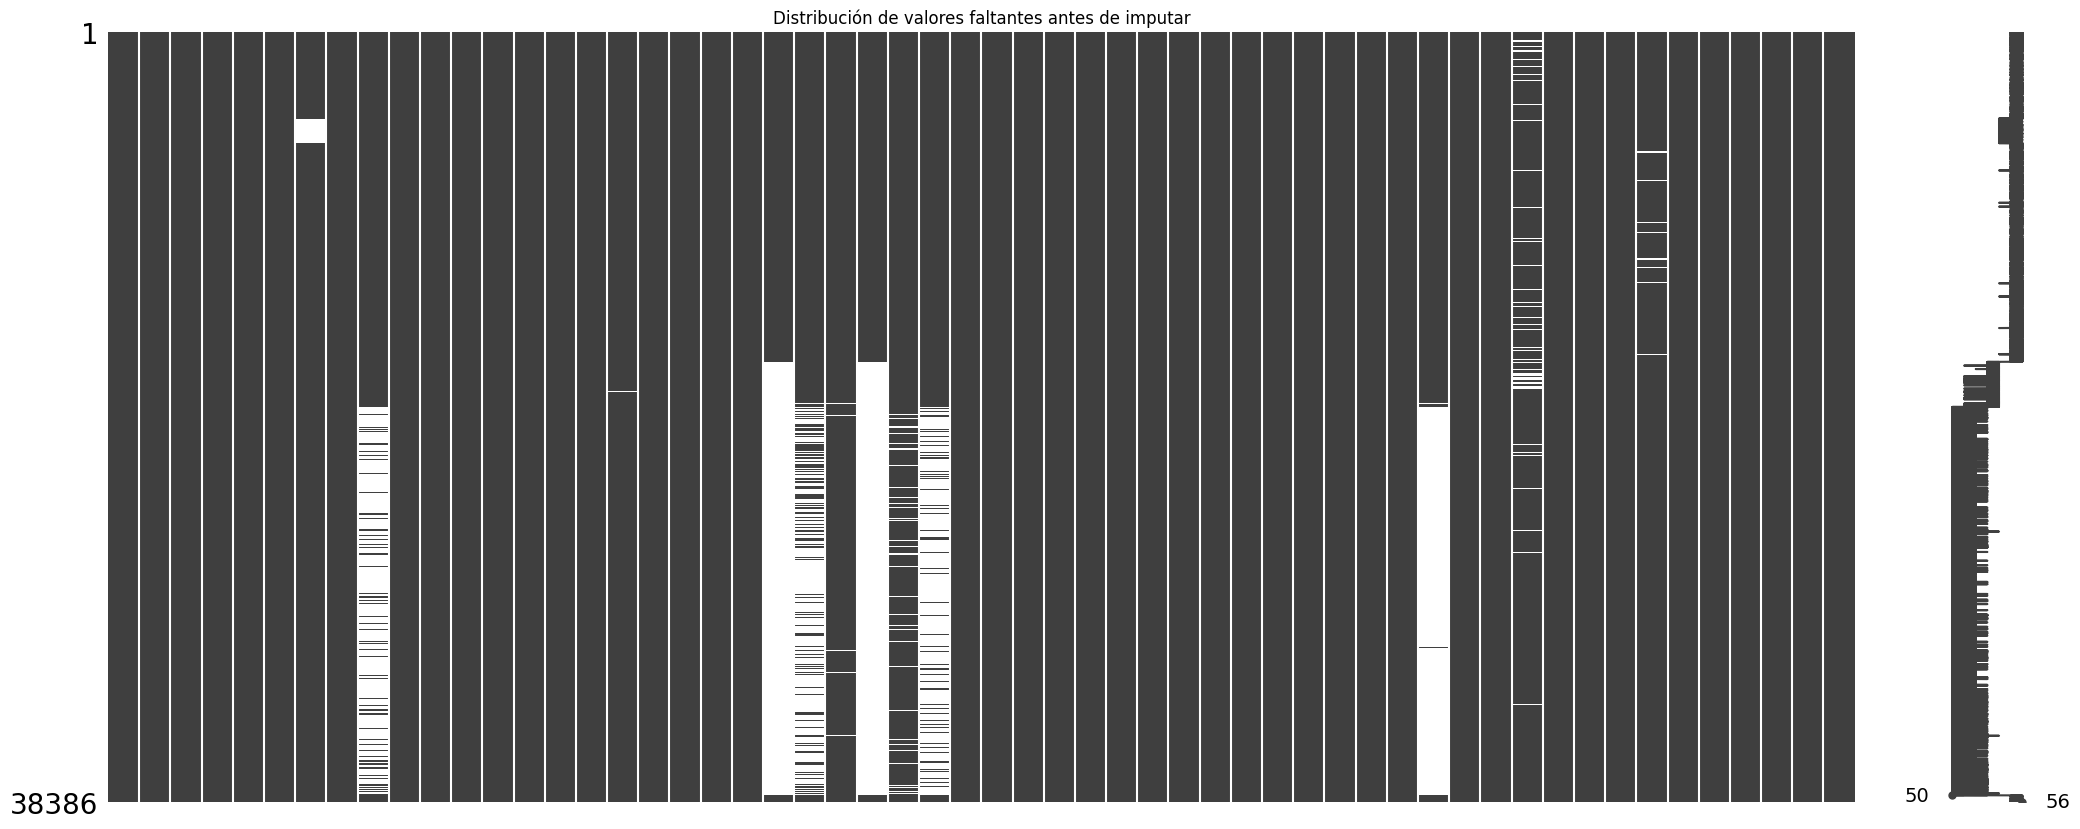

In [92]:
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
msno.matrix(df)
plt.title("Distribución de valores faltantes antes de imputar")
plt.show()

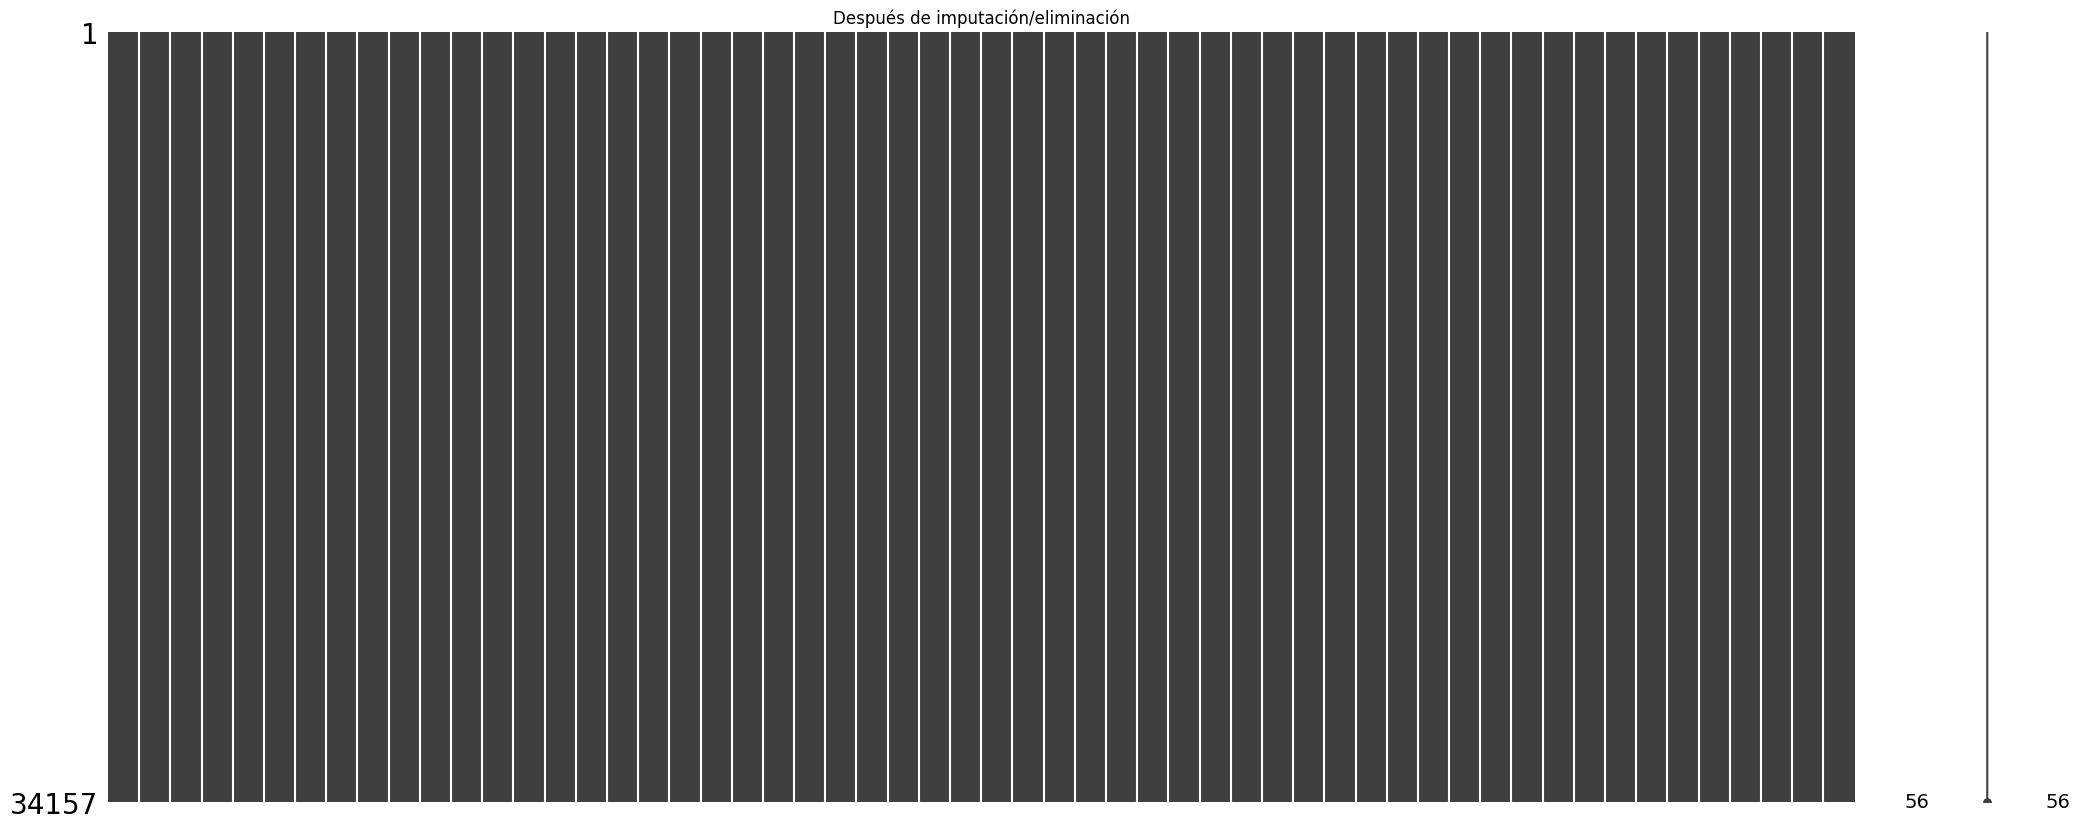

In [93]:
msno.matrix(df_clean)
plt.title("Después de imputación/eliminación")
plt.show()

## 5. Detección & Tratamiento de Outliers
---

Un outlier (valor atípico) es un punto que se aleja significativamente de los demás.
En nuestro dataset, los outliers pueden aparecer en:

- Ingresos / Egresos / Cuotas / Montos
- Días de mora / Plazo / Edad / Estrato

Algunos serán errores (por ejemplo, edad = 500) pero manejamos este tipo de errores en las secciones anteriores, pero otros pueden ser reales (una persona con ingresos muy altos). Por eso no se eliminan ciegamente: se analizan, se justifican y se documentan.

### 5.1 Análisis Estadístico (Z-score, IQR)

La puntuación $Z$ mide cuántas desviaciones estándar está un punto de datos de la media, mientras que el rango intercuartil ($IQR$) mide el rango del 50% central de los datos, siendo la diferencia entre el tercer cuartil ($Q_{3}$) y el primer cuartil ($Q_{1}$). La puntuación $Z$ es útil para distribuciones normales, pero el $IQR$ es más robusto en distribuciones sesgadas o con valores atípicos, ya que no se ve afectado por los extremos. 

In [106]:
def analizar_outliers(df, col, variables_relacionadas = None):
    if variables_relacionadas is None:
        variables_relacionadas = [
            'TOTAL INGRESOS', 'SALDO VENCIDO', 'DIAS DE MORA',
            'SCORE', 'ESTRATO', 'CUOTA DE CREDITOS',
            'TOTAL EGRESOS', 'MONTO APROBADO'
        ]

    print(f"\n🔍 Análisis de outliers para columna: {col}\n{'-'*60}")
    
    # --- Método 1: Z-score ---
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    df = df.copy()
    df['Z_SCORE'] = np.nan
    df.loc[df[col].notna(), 'Z_SCORE'] = z_scores
    
    outliers_z = df[df['Z_SCORE'] > 3]
    print(f"Outliers (Z-score > 3): {len(outliers_z)} registros ({len(outliers_z)/len(df)*100:.2f}%)")

    # --- Método 2: IQR ---
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    print(f"Outliers (IQR ±1.5): {len(outliers_iqr)} registros ({len(outliers_iqr)/len(df)*100:.2f}%)")

    # --- Conjunto de outliers únicos ---
    outliers = df[df.index.isin(outliers_z.index.union(outliers_iqr.index))]
    no_outliers = df[~df.index.isin(outliers.index)]

    print(f"\n📊 Total outliers únicos: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)\n")

    # --- Estadísticas comparativas ---
    resumen = {}
    for var in [col] + variables_relacionadas:
        if var not in df.columns:
            continue
        try:

            mean_o = outliers[var].mean()
            mean_n = no_outliers[var].mean()
            std_o = outliers[var].std()
            std_n = no_outliers[var].std()

            # Pruebas de hipótesis
            # 1. Varianzas: Levene test
            stat_lev, p_lev = levene(outliers[var].dropna(), no_outliers[var].dropna())

            # 2. Medias: t-test (Welch si varianzas distintas)
            equal_var = p_lev >= 0.05
            stat_t, p_t = ttest_ind(outliers[var].dropna(), no_outliers[var].dropna(), equal_var=equal_var)

            
            resumen[var] = {
                'Media_Out': mean_o,
                'Media_NO_Out': mean_n,
                'Std_Out': std_o,
                'Std_NO_Out': std_n,
                'p_ttest': p_t,
                'p_levene': p_lev,
                'Mediana_Out': outliers[var].median(),
                'Mediana_NO_Out': no_outliers[var].median(),
                'Moda_Out': mode(outliers[var], keepdims=True).mode[0] if not outliers[var].isna().all() else np.nan,
                'Moda_NO_Out': mode(no_outliers[var], keepdims=True).mode[0] if not no_outliers[var].isna().all() else np.nan
            }
        except Exception:
            continue

    summary_df = pd.DataFrame(resumen).T.round(3)
    print("📈 Comparativa de variables relacionadas entre outliers y no outliers:\n")
    display(summary_df)

    # --- Retorno estructurado ---
    return {
        'outliers': outliers,
        'no_outliers': no_outliers,
        'resumen': summary_df,
        'limites': {
            'Q1': Q1, 'Q3': Q3,
            'limite_inferior': limite_inferior,
            'limite_superior': limite_superior
        }
    }

In [109]:
o = analizar_outliers(df_clean, 'SALDO VENCIDO')


🔍 Análisis de outliers para columna: SALDO VENCIDO
------------------------------------------------------------
Outliers (Z-score > 3): 867 registros (2.54%)
Outliers (IQR ±1.5): 7819 registros (22.89%)

📊 Total outliers únicos: 7819 (22.89%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
SALDO VENCIDO,4.296929e+06,5.502509e+03,4.100189e+06,3.092870e+04,0.000,0.000,3274237.850,0.000,6451832.06,0.0
TOTAL INGRESOS,8.143086e+06,7.859871e+06,1.054163e+08,1.184896e+08,0.849,0.837,4993539.382,4984653.325,5000000.00,5000000.0
SCORE,6.602950e+02,7.098510e+02,9.214900e+01,9.889700e+01,0.000,0.000,650.000,710.000,611.00,611.0
ESTRATO,3.312000e+00,3.355000e+00,1.050000e+00,1.033000e+00,0.001,0.827,3.000,3.000,3.00,3.0
CUOTA DE CREDITOS,1.600372e+07,5.780689e+07,2.264864e+07,6.162996e+09,0.549,0.549,100000.000,200000.000,0.00,0.0
TOTAL EGRESOS,2.194184e+07,7.788862e+07,3.022474e+07,8.012460e+09,0.537,0.538,650000.000,2462092.604,100000.00,100000.0
MONTO APROBADO,4.914939e+06,3.971580e+06,3.299177e+06,2.970629e+06,0.000,0.000,4150300.000,3331600.000,25000000.00,1936073.0


In [110]:
o = analizar_outliers(df_clean, 'TASA')


🔍 Análisis de outliers para columna: TASA
------------------------------------------------------------
Outliers (Z-score > 3): 0 registros (0.00%)
Outliers (IQR ±1.5): 8498 registros (24.88%)

📊 Total outliers únicos: 8498 (24.88%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
TASA,0.008,2.100000e-02,0.013,2.000000e-03,0.000,0.000,0.0,2.000000e-02,0.0,0.021
TOTAL INGRESOS,7519034.013,8.059057e+06,7836800.272,1.333302e+08,0.709,0.806,5500000.0,4.889292e+06,5000000.0,3638858.983
SALDO VENCIDO,805349.077,1.048317e+06,2200952.169,2.798578e+06,0.000,0.000,0.0,0.000000e+00,0.0,0.000
SCORE,711.199,6.943030e+02,101.510,9.859200e+01,0.000,0.001,704.0,6.930000e+02,611.0,611.000
ESTRATO,3.436,3.315000e+00,1.049,1.031000e+00,0.000,0.000,3.0,3.000000e+00,3.0,3.000
CUOTA DE CREDITOS,70100.513,6.419016e+07,275724.191,6.243974e+09,0.344,0.349,0.0,4.823683e+07,0.0,0.000
TOTAL EGRESOS,340124.273,8.652338e+07,927948.429,8.117735e+09,0.328,0.337,200000.0,6.292475e+07,100000.0,100000.000
MONTO APROBADO,4465521.719,4.095458e+06,3321272.767,2.982738e+06,0.000,0.000,3805500.0,3.433900e+06,5000000.0,1936073.000


In [112]:
o = analizar_outliers(df_clean, 'DIAS DE MORA ')


🔍 Análisis de outliers para columna: DIAS DE MORA 
------------------------------------------------------------
Outliers (Z-score > 3): 265 registros (0.78%)
Outliers (IQR ±1.5): 6276 registros (18.37%)

📊 Total outliers únicos: 6276 (18.37%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
DIAS DE MORA,7.666300e+01,1.424000e+00,1.441490e+02,4.187000e+00,0.000,0.000,54.00,0.000,64.0,0.0
TOTAL INGRESOS,9.986516e+06,7.460590e+06,1.661119e+08,1.008331e+08,0.118,0.118,5000000.00,4984653.325,5000000.0,5000000.0
SALDO VENCIDO,3.891161e+06,3.343382e+05,4.299831e+06,1.487244e+06,0.000,0.000,2673426.22,0.000,0.0,0.0
SCORE,6.646550e+02,7.061270e+02,9.440500e+01,9.914500e+01,0.000,0.000,654.00,705.000,611.0,611.0
ESTRATO,3.319000e+00,3.351000e+00,1.048000e+00,1.034000e+00,0.030,0.853,3.00,3.000,3.0,3.0
CUOTA DE CREDITOS,1.534318e+07,5.564209e+07,2.240027e+07,5.990034e+09,0.594,0.594,100000.00,200000.000,0.0,0.0
TOTAL EGRESOS,2.106365e+07,7.499008e+07,2.990469e+07,7.787595e+09,0.583,0.585,600000.00,2462092.604,100000.0,100000.0
MONTO APROBADO,4.786239e+06,4.052758e+06,3.268846e+06,3.012819e+06,0.000,0.000,4048400.00,3409700.000,25000000.0,1936073.0


In [113]:
o = analizar_outliers(df_clean, 'NO PERSONAS A CARGO')


🔍 Análisis de outliers para columna: NO PERSONAS A CARGO
------------------------------------------------------------
Outliers (Z-score > 3): 837 registros (2.45%)
Outliers (IQR ±1.5): 3809 registros (11.15%)

📊 Total outliers únicos: 3809 (11.15%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
NO PERSONAS A CARGO,1.322000e+00,0.000000e+00,8.550000e-01,0.000000e+00,0.000,0.000,1.000000e+00,0.000,1.000000e+00,0.0
TOTAL INGRESOS,5.421273e+06,8.238910e+06,3.353127e+06,1.226586e+08,0.156,0.157,4.941985e+06,4992769.266,5.161848e+06,5000000.0
SALDO VENCIDO,9.310175e+05,9.950035e+05,2.617323e+06,2.670318e+06,0.162,0.162,0.000000e+00,0.000,0.000000e+00,0.0
SCORE,7.043630e+02,6.977720e+02,9.577200e+01,1.000400e+02,0.000,0.000,7.060000e+02,695.000,6.650000e+02,611.0
ESTRATO,2.880000e+00,3.404000e+00,9.640000e-01,1.031000e+00,0.000,0.000,3.000000e+00,3.000,3.000000e+00,3.0
CUOTA DE CREDITOS,2.633791e+07,5.098622e+07,2.391181e+07,5.741421e+09,0.791,0.755,4.823685e+07,100000.000,4.823758e+07,0.0
TOTAL EGRESOS,3.585861e+07,6.874945e+07,3.173587e+07,7.464376e+09,0.786,0.745,6.508088e+07,1000000.000,6.508165e+07,100000.0
MONTO APROBADO,3.608104e+06,4.260251e+06,2.496762e+06,3.132059e+06,0.000,0.000,3.036000e+06,3593500.000,1.936073e+06,5000000.0


In [114]:
o = analizar_outliers(df_clean, 'PASIVOS')


🔍 Análisis de outliers para columna: PASIVOS
------------------------------------------------------------
Outliers (Z-score > 3): 1 registros (0.00%)
Outliers (IQR ±1.5): 1 registros (0.00%)

📊 Total outliers únicos: 1 (0.00%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
PASIVOS,1.000000e+13,2.553904e+08,NaN,2.728316e+08,0.000,0.346,1.000000e+13,2000000.000,1.000000e+13,0.0
TOTAL INGRESOS,4.304298e+06,7.924809e+06,NaN,1.156277e+08,0.975,0.970,4.304298e+06,4985680.429,4.304298e+06,5000000.0
SALDO VENCIDO,0.000000e+00,9.878971e+05,NaN,2.664532e+06,0.711,0.711,0.000000e+00,0.000,0.000000e+00,0.0
SCORE,7.250000e+02,6.985060e+02,NaN,9.959400e+01,0.790,0.149,7.250000e+02,696.000,7.250000e+02,611.0
ESTRATO,3.000000e+00,3.345000e+00,NaN,1.037000e+00,0.739,0.370,3.000000e+00,3.000,3.000000e+00,3.0
CUOTA DE CREDITOS,1.000000e+05,4.823899e+07,NaN,5.411916e+09,0.993,0.993,1.000000e+05,150000.000,1.000000e+05,0.0
TOTAL EGRESOS,3.934814e+10,6.393154e+07,NaN,7.032779e+09,0.000,0.993,3.934814e+10,2397055.238,3.934814e+10,100000.0
MONTO APROBADO,7.057210e+05,4.187629e+06,NaN,3.074555e+06,0.257,0.394,7.057210e+05,3527150.000,7.057210e+05,1936073.0


In [115]:
o = analizar_outliers(df_clean, 'SCORE')


🔍 Análisis de outliers para columna: SCORE
------------------------------------------------------------
Outliers (Z-score > 3): 47 registros (0.14%)
Outliers (IQR ±1.5): 58 registros (0.17%)

📊 Total outliers únicos: 58 (0.17%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
SCORE,9.982590e+02,6.979970e+02,1.585000e+00,9.890700e+01,0.000,0.000,999.0,696.000,999.0,611.0
TOTAL INGRESOS,8.954261e+06,7.922952e+06,6.711901e+06,1.157240e+08,0.946,0.981,8000000.0,4985680.429,8000000.0,5000000.0
SALDO VENCIDO,1.094571e+05,9.893623e+05,4.622207e+05,2.666450e+06,0.000,0.012,0.0,0.000,0.0,0.0
ESTRATO,4.138000e+00,3.344000e+00,1.017000e+00,1.036000e+00,0.000,0.966,4.0,3.000,4.0,3.0
CUOTA DE CREDITOS,1.174462e+07,4.829965e+07,2.076683e+07,5.416437e+09,0.959,0.959,100000.0,150000.000,0.0,0.0
TOTAL EGRESOS,1.622370e+07,6.516475e+07,2.772726e+07,7.041868e+09,0.958,0.958,500000.0,2397195.550,200000.0,100000.0
MONTO APROBADO,4.855997e+06,4.186390e+06,3.637309e+06,3.073462e+06,0.097,0.105,4330562.5,3526500.000,390000.0,1936073.0


In [116]:
o = analizar_outliers(df_clean, 'CUOTAMENSUAL')


🔍 Análisis de outliers para columna: CUOTAMENSUAL
------------------------------------------------------------
Outliers (Z-score > 3): 76 registros (0.22%)
Outliers (IQR ±1.5): 2967 registros (8.69%)

📊 Total outliers únicos: 2967 (8.69%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
CUOTAMENSUAL,5.040571e+14,1.967187e+05,3.389528e+15,1.056839e+05,0.000,0.000,2.007934e+10,174731.672,1.930001e+11,70000.0
TOTAL INGRESOS,9.563667e+06,7.768794e+06,1.022459e+07,1.209586e+08,0.419,0.650,7.000000e+06,4894946.753,6.000000e+06,5000000.0
SALDO VENCIDO,1.737971e+06,9.165134e+05,4.576411e+06,2.392621e+06,0.000,0.000,0.000000e+00,0.000,0.000000e+00,0.0
SCORE,7.035680e+02,6.980250e+02,1.040420e+02,9.914800e+01,0.005,0.001,6.910000e+02,696.000,6.110000e+02,611.0
ESTRATO,3.550000e+00,3.326000e+00,1.071000e+00,1.031000e+00,0.000,0.000,3.000000e+00,3.000,3.000000e+00,3.0
CUOTA DE CREDITOS,4.676014e+06,5.238144e+07,1.414917e+07,5.663384e+09,0.646,0.647,5.000000e+03,200000.000,0.000000e+00,0.0
TOTAL EGRESOS,6.621232e+06,7.064279e+07,1.898500e+07,7.362920e+09,0.636,0.638,2.000000e+05,2501771.094,1.000000e+05,100000.0
MONTO APROBADO,8.420782e+06,3.784832e+06,6.070615e+06,2.231752e+06,0.000,0.000,6.327500e+06,3393000.000,2.500000e+07,1936073.0


In [117]:
o = analizar_outliers(df_clean, 'INGRESOS FIJOS')


🔍 Análisis de outliers para columna: INGRESOS FIJOS
------------------------------------------------------------
Outliers (Z-score > 3): 8 registros (0.02%)
Outliers (IQR ±1.5): 2823 registros (8.26%)

📊 Total outliers únicos: 2823 (8.26%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
INGRESOS FIJOS,4.232952e+07,4.082476e+06,5.509531e+08,2.236342e+06,0.000,0.000,1.510000e+07,3500000.000,15000000.0,3000000.0
TOTAL INGRESOS,3.690618e+07,5.313651e+06,4.010441e+08,2.393445e+06,0.000,0.000,1.733923e+07,4709912.622,15000000.0,5000000.0
SALDO VENCIDO,1.115110e+06,9.764044e+05,3.317734e+06,2.597351e+06,0.031,0.008,0.000000e+00,0.000,0.0,0.0
SCORE,7.138900e+02,6.971210e+02,1.028990e+02,9.917400e+01,0.000,0.011,7.070000e+02,695.000,611.0,611.0
ESTRATO,3.885000e+00,3.296000e+00,1.048000e+00,1.022000e+00,0.000,0.000,4.000000e+00,3.000,4.0,3.0
CUOTA DE CREDITOS,6.844045e+06,5.196688e+07,1.668327e+07,5.650357e+09,0.671,0.672,3.500000e+04,200000.000,0.0,0.0
TOTAL EGRESOS,9.483988e+06,7.009065e+07,2.237321e+07,7.345984e+09,0.661,0.663,1.500000e+05,2462234.129,100000.0,100000.0
MONTO APROBADO,6.439541e+06,3.984635e+06,4.747912e+06,2.788593e+06,0.000,0.000,5.186650e+06,3416575.000,25000000.0,1936073.0


In [119]:
o = analizar_outliers(df_clean, 'ESTRATO')


🔍 Análisis de outliers para columna: ESTRATO
------------------------------------------------------------
Outliers (Z-score > 3): 0 registros (0.00%)
Outliers (IQR ±1.5): 2208 registros (6.46%)

📊 Total outliers únicos: 2208 (6.46%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
ESTRATO,4.231000e+00,3.284000e+00,2.391000e+00,8.340000e-01,0.000,0.000,6.0,3.000,6.0,3.0
TOTAL INGRESOS,1.235139e+07,7.618774e+06,1.980161e+08,1.076254e+08,0.063,0.075,5500004.0,4976794.372,6000000.0,5000000.0
SALDO VENCIDO,1.089062e+06,9.808746e+05,3.023726e+06,2.637776e+06,0.065,0.065,0.0,0.000,0.0,0.0
SCORE,6.974520e+02,6.985800e+02,1.020450e+02,9.942300e+01,0.607,0.383,691.0,696.000,611.0,611.0
CUOTA DE CREDITOS,1.811954e+07,5.031904e+07,2.326903e+07,5.595715e+09,0.787,0.787,250000.0,150000.000,0.0,0.0
TOTAL EGRESOS,2.481607e+07,6.786441e+07,3.105628e+07,7.274946e+09,0.781,0.781,1500000.0,2398558.773,100000.0,100000.0
MONTO APROBADO,4.564451e+06,4.161478e+06,3.491957e+06,3.041945e+06,0.000,0.000,3706750.0,3515000.000,1936073.0,5000000.0


In [120]:
o = analizar_outliers(df_clean, 'ACTIVOS')


🔍 Análisis de outliers para columna: ACTIVOS
------------------------------------------------------------
Outliers (Z-score > 3): 22 registros (0.06%)
Outliers (IQR ±1.5): 981 registros (2.87%)

📊 Total outliers únicos: 981 (2.87%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
ACTIVOS,6.398225e+09,1.026024e+08,4.925996e+10,1.105531e+08,0.000,0.000,600000000.0,5.050040e+07,500000000.0,0.0
TOTAL INGRESOS,2.436066e+07,7.438699e+06,2.968685e+08,1.056081e+08,0.075,0.000,10500000.0,4.961403e+06,25000000.0,5000000.0
SALDO VENCIDO,7.059181e+05,9.962053e+05,2.832681e+06,2.658954e+06,0.002,0.001,0.0,0.000000e+00,0.0,0.0
SCORE,7.444700e+02,6.971480e+02,1.016280e+02,9.921000e+01,0.000,0.488,752.0,6.950000e+02,611.0,611.0
ESTRATO,4.107000e+00,3.323000e+00,1.180000e+00,1.024000e+00,0.000,0.000,4.0,3.000000e+00,3.0,3.0
CUOTA DE CREDITOS,1.746530e+07,4.914750e+07,2.306064e+07,5.491265e+09,0.857,0.857,100000.0,1.500000e+05,0.0,0.0
TOTAL EGRESOS,2.376004e+07,6.630351e+07,3.083301e+07,7.139151e+09,0.852,0.852,600000.0,2.410049e+06,200000.0,100000.0
MONTO APROBADO,5.445954e+06,4.150316e+06,4.189027e+06,3.027526e+06,0.000,0.000,4261244.0,3.504550e+06,1936073.0,5000000.0


In [121]:
o = analizar_outliers(df_clean, 'MONTO APROBADO')


🔍 Análisis de outliers para columna: MONTO APROBADO
------------------------------------------------------------
Outliers (Z-score > 3): 679 registros (1.99%)
Outliers (IQR ±1.5): 1620 registros (4.74%)

📊 Total outliers únicos: 1620 (4.74%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
MONTO APROBADO,1.392973e+07,3.702468e+06,4.073182e+06,2.033986e+06,0.000,0.000,12572500.0,3396000.000,25000000.0,1936073.0
TOTAL INGRESOS,1.194039e+07,7.724764e+06,1.142714e+07,1.184386e+08,0.152,0.517,9000000.0,4900000.000,10000000.0,5000000.0
SALDO VENCIDO,3.014751e+06,8.869507e+05,6.533420e+06,2.261473e+06,0.000,0.000,0.0,0.000,0.0,0.0
SCORE,7.088160e+02,6.979940e+02,1.027270e+02,9.940800e+01,0.000,0.113,698.0,696.000,611.0,611.0
ESTRATO,3.755000e+00,3.325000e+00,1.081000e+00,1.030000e+00,0.000,0.000,4.0,3.000,3.0,3.0
CUOTA DE CREDITOS,1.116554e+07,5.008338e+07,2.024996e+07,5.544922e+09,0.778,0.778,50000.0,200000.000,0.0,0.0
TOTAL EGRESOS,1.538953e+07,6.755579e+07,2.705459e+07,7.208910e+09,0.771,0.772,400000.0,2462028.792,100000.0,100000.0


In [122]:
o = analizar_outliers(df_clean, 'MONTO PREAPROBADO')


🔍 Análisis de outliers para columna: MONTO PREAPROBADO
------------------------------------------------------------
Outliers (Z-score > 3): 679 registros (1.99%)
Outliers (IQR ±1.5): 1621 registros (4.75%)

📊 Total outliers únicos: 1621 (4.75%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
MONTO PREAPROBADO,1.392827e+07,3.702431e+06,4.072348e+06,2.034007e+06,0.000,0.000,12569000.0,3396000.000,25000000.0,1936073.0
TOTAL INGRESOS,1.193577e+07,7.724865e+06,1.142513e+07,1.184405e+08,0.152,0.517,9000000.0,4900000.000,10000000.0,5000000.0
SALDO VENCIDO,3.012891e+06,8.869780e+05,6.531833e+06,2.261503e+06,0.000,0.000,0.0,0.000,0.0,0.0
SCORE,7.088270e+02,6.979930e+02,1.026960e+02,9.941000e+01,0.000,0.119,698.0,696.000,611.0,611.0
ESTRATO,3.756000e+00,3.325000e+00,1.081000e+00,1.030000e+00,0.000,0.000,4.0,3.000,3.0,3.0
CUOTA DE CREDITOS,1.118841e+07,5.008343e+07,2.026464e+07,5.545007e+09,0.778,0.778,50000.0,200000.000,0.0,0.0
TOTAL EGRESOS,1.542019e+07,6.755587e+07,2.707439e+07,7.209021e+09,0.771,0.772,400000.0,2462028.792,100000.0,100000.0
MONTO APROBADO,1.392416e+07,3.702431e+06,4.078089e+06,2.034007e+06,0.000,0.000,12569000.0,3396000.000,25000000.0,1936073.0


In [123]:
o = analizar_outliers(df_clean, 'ESTRATO')


🔍 Análisis de outliers para columna: ESTRATO
------------------------------------------------------------
Outliers (Z-score > 3): 0 registros (0.00%)
Outliers (IQR ±1.5): 2208 registros (6.46%)

📊 Total outliers únicos: 2208 (6.46%)

📈 Comparativa de variables relacionadas entre outliers y no outliers:



,Media_Out,Media_NO_Out,Std_Out,Std_NO_Out,p_ttest,p_levene,Mediana_Out,Mediana_NO_Out,Moda_Out,Moda_NO_Out
ESTRATO,4.231000e+00,3.284000e+00,2.391000e+00,8.340000e-01,0.000,0.000,6.0,3.000,6.0,3.0
TOTAL INGRESOS,1.235139e+07,7.618774e+06,1.980161e+08,1.076254e+08,0.063,0.075,5500004.0,4976794.372,6000000.0,5000000.0
SALDO VENCIDO,1.089062e+06,9.808746e+05,3.023726e+06,2.637776e+06,0.065,0.065,0.0,0.000,0.0,0.0
SCORE,6.974520e+02,6.985800e+02,1.020450e+02,9.942300e+01,0.607,0.383,691.0,696.000,611.0,611.0
CUOTA DE CREDITOS,1.811954e+07,5.031904e+07,2.326903e+07,5.595715e+09,0.787,0.787,250000.0,150000.000,0.0,0.0
TOTAL EGRESOS,2.481607e+07,6.786441e+07,3.105628e+07,7.274946e+09,0.781,0.781,1500000.0,2398558.773,100000.0,100000.0
MONTO APROBADO,4.564451e+06,4.161478e+06,3.491957e+06,3.041945e+06,0.000,0.000,3706750.0,3515000.000,1936073.0,5000000.0


### 5.2 Estrategias de manejo: eliminación, transformación logarítmica, winsorización

| Caso                                                                                          | Acción           | Justificación                                             |
| --------------------------------------------------------------------------------------------- | --------------------------- | --------------------------------------------------------- |
| Error obvio (edad negativa, monto negativo, fecha futura)                                     | ❌ Eliminar                  | No tiene sentido físico                                   |
| Valor extremo pero posible (deudas altas, ingresos grandes)                                   | 🔁 Transformar o Winsorizar | Su magnitud sesga el modelo, pero tiene valor informativo |
| Valor extremo *y* estadísticamente inconsistente (sin correlación con otras variables, ruido) | ⚠️ Revisar manualmente      | Puede venir de mezcla de tipos de créditos distintos      |


Empezamos reemplazando los outliers de `PASIVOS` dado que solamente es 1 registro y su valor es claramente absurdo comparado con el resto (la media normal es 2.5e+08 y ese uno tiene 1e+13).

In [133]:
df_clean = df_clean[df_clean['PASIVOS'] < 1e+12]

#### A. LOG-TRANSFORMACIÓN

In [134]:
for col in ['SALDO VENCIDO', 'DIAS DE MORA ', 'TOTAL INGRESOS', 
            'INGRESOS FIJOS', 'MONTO APROBADO', 'MONTO PREAPROBADO']:
    df_clean[f'{col}_LOG'] = np.log1p(df_clean[col])  # log(1+x) evita log(0)
    print(f'Transformación Logarítmica aplicada a: {col}')

Transformación Logarítmica aplicada a: SALDO VENCIDO
Transformación Logarítmica aplicada a: DIAS DE MORA 
Transformación Logarítmica aplicada a: TOTAL INGRESOS
Transformación Logarítmica aplicada a: INGRESOS FIJOS
Transformación Logarítmica aplicada a: MONTO APROBADO
Transformación Logarítmica aplicada a: MONTO PREAPROBADO


#### B. WINSORIZACIÓN

In [135]:
# CUOTAMENSUAL
q99_cuota = df_clean['CUOTAMENSUAL'].quantile(0.99)
df_clean['CUOTAMENSUAL'] = df_clean['CUOTAMENSUAL'].clip(upper=q99_cuota)
print(f'Winsorización aplicada a CUOTAMENSUAL (P99 = {q99_cuota:.2f})')

# ACTIVOS
q99_activos = df_clean['ACTIVOS'].quantile(0.99)
df_clean['ACTIVOS'] = df_clean['ACTIVOS'].clip(upper=q99_activos)
print(f'Winsorización aplicada a ACTIVOS (P99 = {q99_activos:.2f})')

Winsorización aplicada a CUOTAMENSUAL (P99 = 387000359161.00)
Winsorización aplicada a ACTIVOS (P99 = 700000000.00)


#### C. SCORE

In [136]:
score_invalidos = (df_clean['SCORE'] > 900).sum()
df_clean.loc[df_clean['SCORE'] > 900, 'SCORE'] = 900
print(f'SCORE winsorizado: {score_invalidos} valores >900 ajustados a 900')

SCORE winsorizado: 834 valores >900 ajustados a 900


#### 4. ESTRATO (clip al rango 1–6)

In [137]:
df_clean['ESTRATO'] = df_clean['ESTRATO'].clip(1, 6)
print('ESTRATO limitado al rango 1–6')

ESTRATO limitado al rango 1–6


### 5.3 Modelos ML para detección (Isolation Forest, DBSCAN)

In [140]:
# 1. Variables numéricas relevantes
num_vars = [
    'NO PERSONAS A CARGO',
    'ANTIGUEDAD EN LA CIUDAD tiempo en residencia',
    'ESTRATO',
    'INGRESOS FIJOS_LOG',
    'TOTAL INGRESOS_LOG',
    'CUOTA DE CREDITOS',
    'GASTOS DE SOSTENIMIENTO',
    'TOTAL EGRESOS',
    'ACTIVOS',
    'MONTO PREAPROBADO_LOG',
    'MONTO APROBADO_LOG',
    'PLAZO',
    'MONTO DESEMBOLSO',
    'TASA',
    'CUOTAMENSUAL', 
    'SCORE',
    'SALDO CAPITAL',
    'SALDO VENCIDO_LOG',
    'DIAS DE MORA _LOG'
]

# 2. Normaliza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[num_vars].fillna(0))

# 3. Modelo Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
df_clean['is_outlier_ml'] = iso.fit_predict(X_scaled)

# 4. Interpretación
print(df_clean['is_outlier_ml'].value_counts())

is_outlier_ml
 1    33472
-1      684
Name: count, dtype: int64


### 5.4 Visualización con Boxplots y Scatterplots

In [141]:
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['TRANSACTION ID', 'NO PERSONAS A CARGO',
       'ANTIGUEDAD EN LA CIUDAD tiempo en residencia', 'ESTRATO',
       'INGRESOS FIJOS', 'TOTAL INGRESOS', 'CUOTA DE CREDITOS',
       'GASTOS DE SOSTENIMIENTO', 'TOTAL EGRESOS', 'ACTIVOS', 'PASIVOS',
       'MONTO PREAPROBADO', 'NO CREDITO', 'MONTO APROBADO', 'PLAZO',
       'MONTO DESEMBOLSO', 'IDENTIFICACION COMERCIAL', 'TASA', 'CUOTAMENSUAL',
       'CODIGO CIIU', 'SCORE', 'SEGURO', 'AVAL', 'CODIGO CONFIRMACION CREDITO',
       'PAGARE_ID', 'NUMERO CREDITO TESEO', 'SALDO CAPITAL', 'SALDO VENCIDO',
       'DIAS DE MORA ', 'EDAD', 'is_outlier_ml', 'SALDO VENCIDO_LOG',
       'DIAS DE MORA _LOG', 'TOTAL INGRESOS_LOG', 'INGRESOS FIJOS_LOG',
       'MONTO APROBADO_LOG', 'MONTO PREAPROBADO_LOG'],
      dtype='object')

#### BOXPLOTS

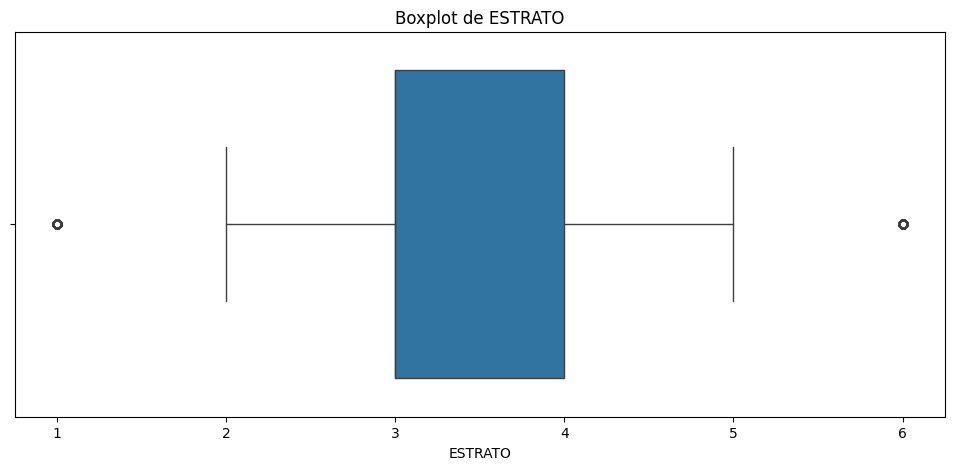

In [142]:
bxplt_var = 'ESTRATO'
plt.figure(figsize=(12,5))
sns.boxplot(x=df_clean[bxplt_var])
plt.title(f"Boxplot de {bxplt_var}")
plt.show()

#### Comparación de Histogramas

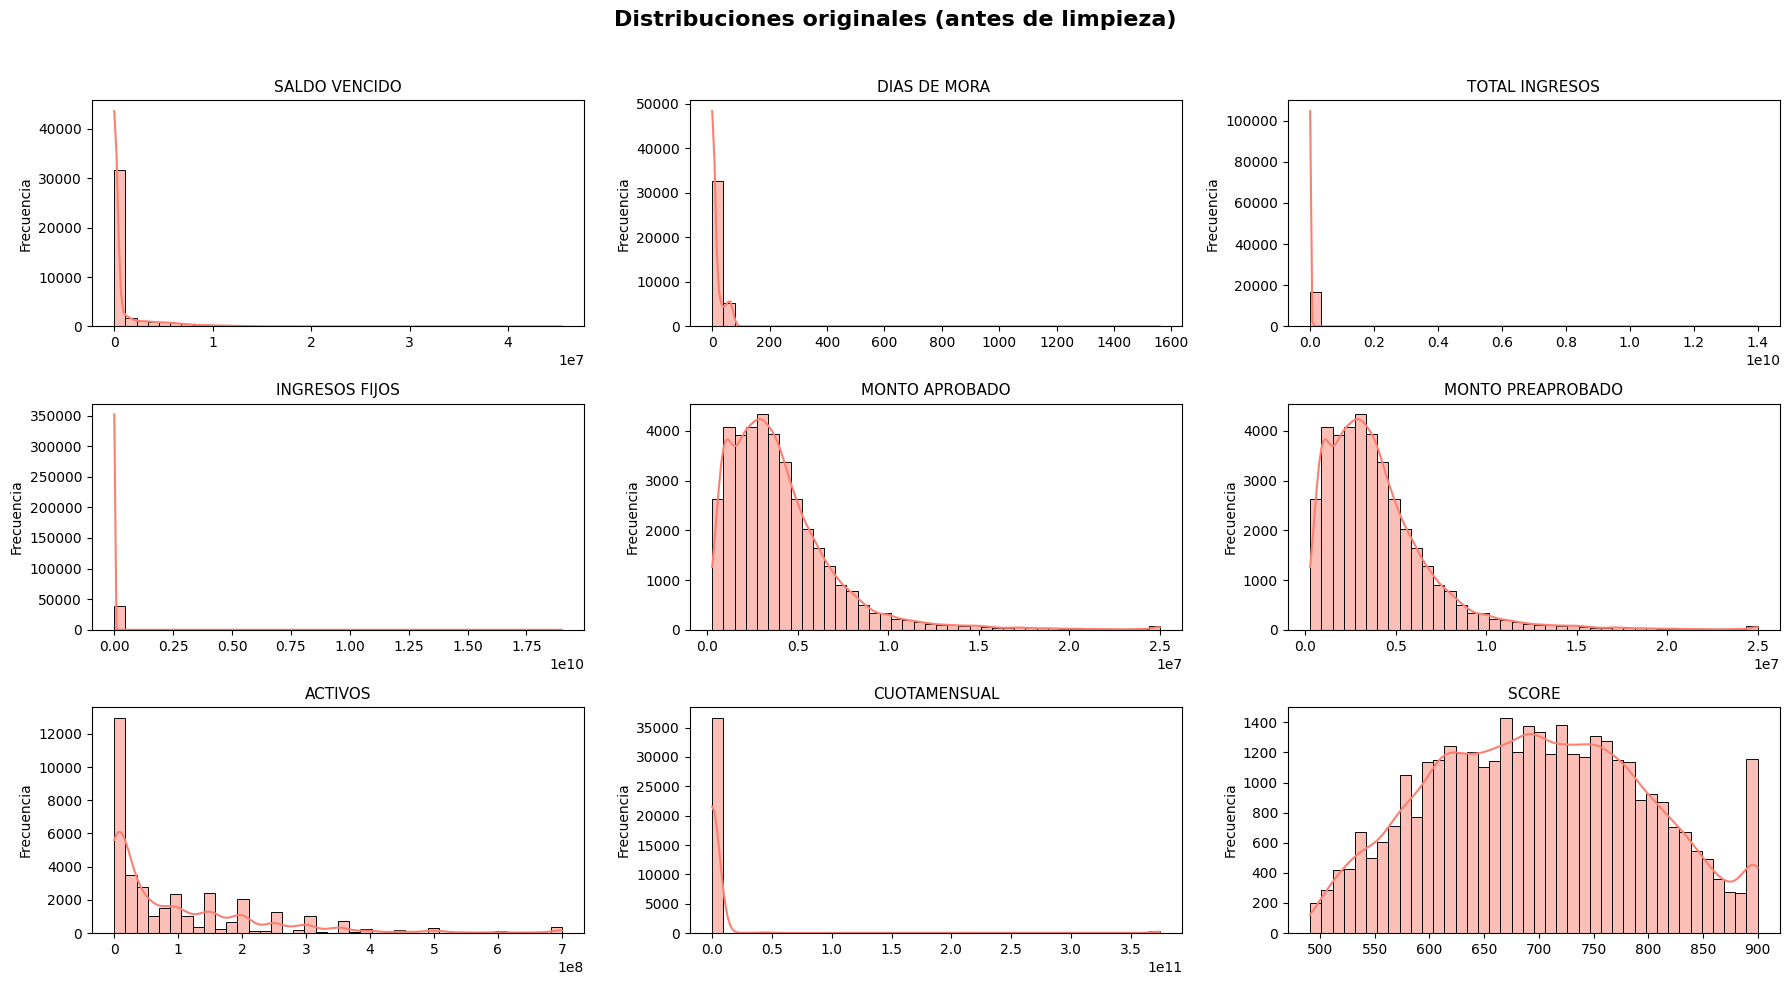

In [146]:
cols = [
    'SALDO VENCIDO', 'DIAS DE MORA ', 'TOTAL INGRESOS', 
    'INGRESOS FIJOS', 'MONTO APROBADO', 'MONTO PREAPROBADO',
    'ACTIVOS', 'CUOTAMENSUAL', 'SCORE'
]

plt.figure(figsize=(18, 10))
plt.suptitle("Distribuciones originales (antes de limpieza)", fontsize=16, fontweight='bold')

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=40, kde=True, color='salmon')
    plt.title(col, fontsize=11)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

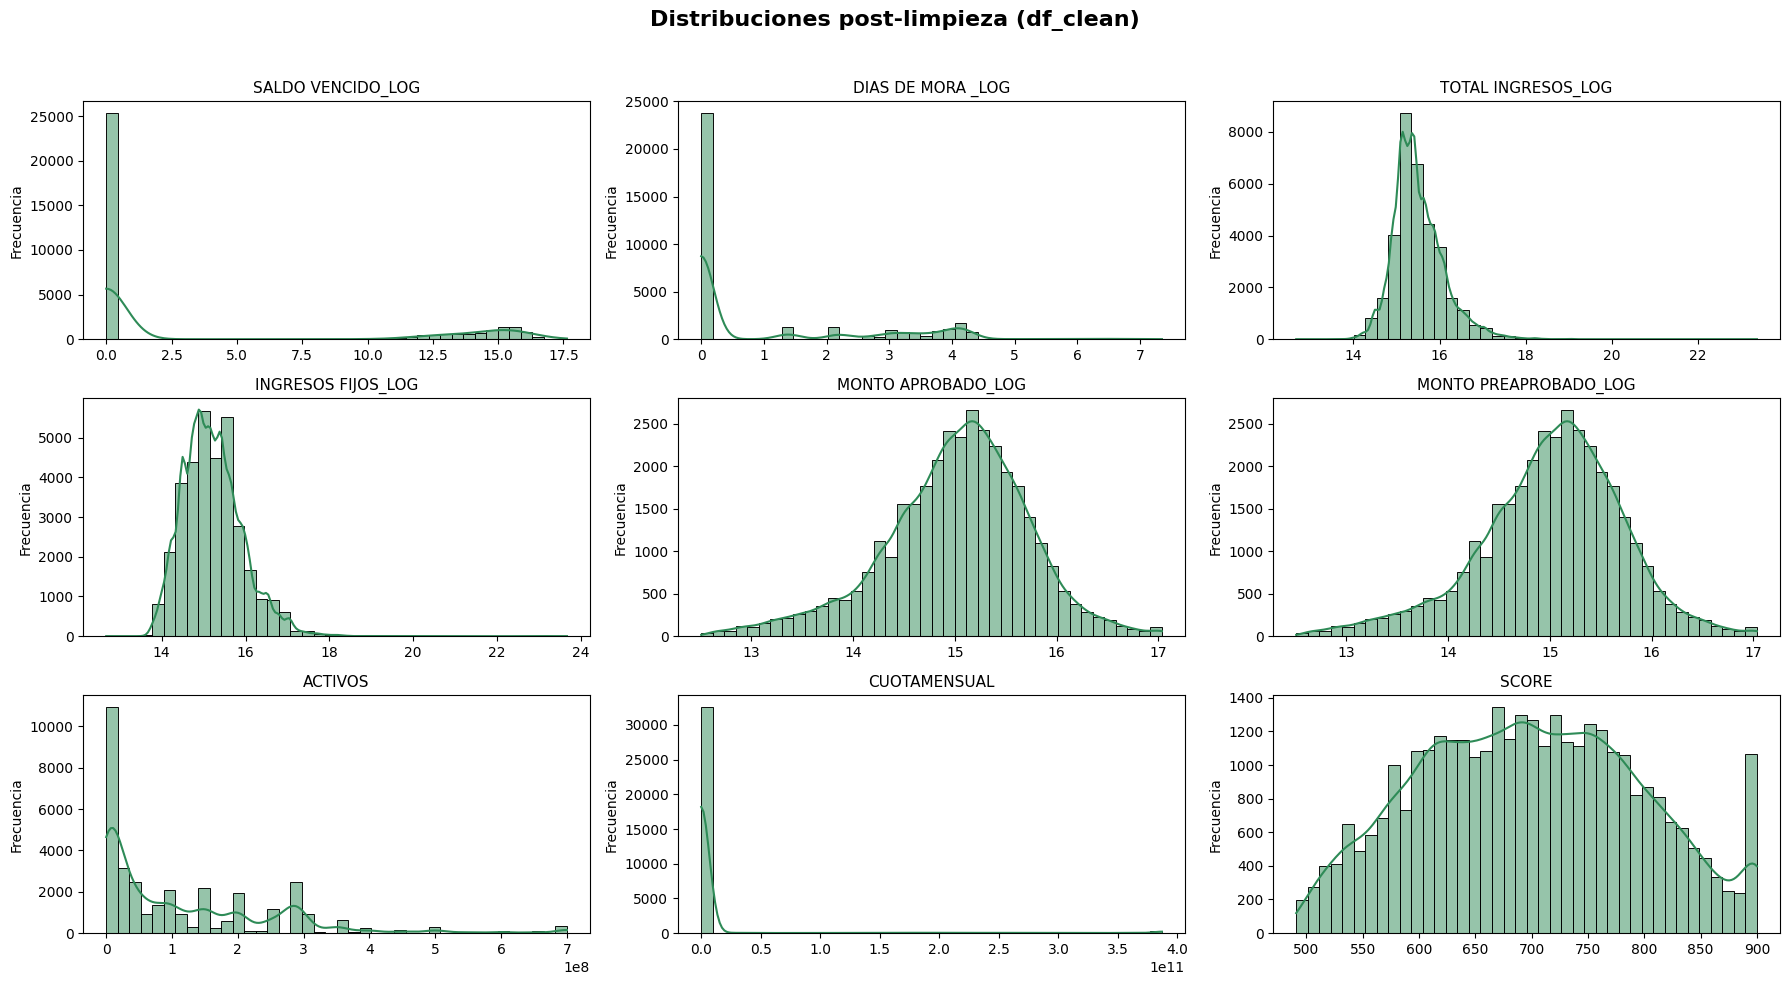

In [147]:
cols = [
    'SALDO VENCIDO_LOG', 'DIAS DE MORA _LOG', 'TOTAL INGRESOS_LOG', 
    'INGRESOS FIJOS_LOG', 'MONTO APROBADO_LOG', 'MONTO PREAPROBADO_LOG',
    'ACTIVOS', 'CUOTAMENSUAL', 'SCORE'
]

plt.figure(figsize=(18, 10))
plt.suptitle("Distribuciones post-limpieza (df_clean)", fontsize=16, fontweight='bold')

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_clean[col], bins=40, kde=True, color='seagreen')
    plt.title(col, fontsize=11)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 6. Normalización & Estandarización
---

In [155]:
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['TRANSACTION ID', 'NO PERSONAS A CARGO',
       'ANTIGUEDAD EN LA CIUDAD tiempo en residencia', 'ESTRATO',
       'INGRESOS FIJOS', 'TOTAL INGRESOS', 'CUOTA DE CREDITOS',
       'GASTOS DE SOSTENIMIENTO', 'TOTAL EGRESOS', 'ACTIVOS', 'PASIVOS',
       'MONTO PREAPROBADO', 'NO CREDITO', 'MONTO APROBADO', 'PLAZO',
       'MONTO DESEMBOLSO', 'IDENTIFICACION COMERCIAL', 'TASA', 'CUOTAMENSUAL',
       'CODIGO CIIU', 'SCORE', 'SEGURO', 'AVAL', 'CODIGO CONFIRMACION CREDITO',
       'PAGARE_ID', 'NUMERO CREDITO TESEO', 'SALDO CAPITAL', 'SALDO VENCIDO',
       'DIAS DE MORA ', 'EDAD', 'is_outlier_ml', 'SALDO VENCIDO_LOG',
       'DIAS DE MORA _LOG', 'TOTAL INGRESOS_LOG', 'INGRESOS FIJOS_LOG',
       'MONTO APROBADO_LOG', 'MONTO PREAPROBADO_LOG'],
      dtype='object')

In [175]:
# --- Definir columnas por tipo ---
cols_robust = [
    'INGRESOS FIJOS_LOG', 'TOTAL INGRESOS_LOG', 'CUOTA DE CREDITOS',
    'GASTOS DE SOSTENIMIENTO', 'TOTAL EGRESOS', 'ACTIVOS',
    'PASIVOS', 'MONTO PREAPROBADO', 'MONTO APROBADO',
    'MONTO DESEMBOLSO', 'SALDO CAPITAL', 'SALDO VENCIDO',
    'CUOTAMENSUAL'
]

cols_zscore = [
    'EDAD', 'ESTRATO', 'NO PERSONAS A CARGO',
    'ANTIGUEDAD EN LA CIUDAD tiempo en residencia',
    'PLAZO', 'SCORE'
]

cols_minmax = [
    'TASA', 'SALDO VENCIDO_LOG', 'DIAS DE MORA _LOG',
    'TOTAL INGRESOS_LOG', 'INGRESOS FIJOS_LOG',
    'MONTO APROBADO_LOG', 'MONTO PREAPROBADO_LOG'
]

# --- Crear copia para no alterar el df original ---
df_scaled = df_clean.copy()

# --- Aplicar escaladores según tipo ---
scaler_minmax = MinMaxScaler()
df_scaled[cols_minmax] = scaler_minmax.fit_transform(df_scaled[cols_minmax])

scaler_zscore = StandardScaler()
df_scaled[cols_zscore] = scaler_zscore.fit_transform(df_scaled[cols_zscore])

scaler_robust = RobustScaler()
df_scaled[cols_robust] = scaler_robust.fit_transform(df_scaled[cols_robust])

df_scaled.describe().T.head(10)

,count,mean,min,25%,50%,75%,max,std
TRANSACTION ID,34156.0,1502219.319651,1173594.0,1316930.75,1398909.5,1681022.5,2049778.0,231537.71686
FECHA NACIMIENTO,34156,1983-10-31 15:45:06.007729216,1945-09-17 00:00:00,1973-06-04 00:00:00,1986-05-16 14:30:00,1995-12-29 00:00:00,2009-09-11 00:00:00,NaN
FECHA EXP DOC,34156,2002-09-21 13:23:20.117109760,1950-04-01 00:00:00,1992-09-01 23:00:00,2004-12-15 09:30:00,2014-07-22 01:15:00,2025-01-18 05:00:00,NaN
NO PERSONAS A CARGO,34156.0,0.0,-0.292162,-0.292162,-0.292162,-0.292162,21.500579,1.000015
ANTIGUEDAD EN LA CIUDAD tiempo en residencia,34156.0,-0.0,-1.341937,-0.864751,-0.251225,1.180334,1.453012,1.000015
ESTRATO,34156.0,0.0,-2.261856,-0.332892,-0.332892,0.631589,2.560552,1.000015
INGRESOS FIJOS,34156.0,7243623.500586,320000.0,2500000.0,3800000.0,6000000.0,19000000000.0,158731718.602046
TOTAL INGRESOS,34156.0,7924809.109133,320000.0,3638858.982709,4985680.429202,7500000.0,14000000000.0,115627707.163081
CUOTA DE CREDITOS,34156.0,0.996934,-0.00311,-0.00311,0.0,0.99689,20731.109892,112.194511
GASTOS DE SOSTENIMIENTO,34156.0,8.051184,-0.8,-0.4,0.0,0.6,259999.242,1406.84184


### 6.2 Validación Post-Normalización

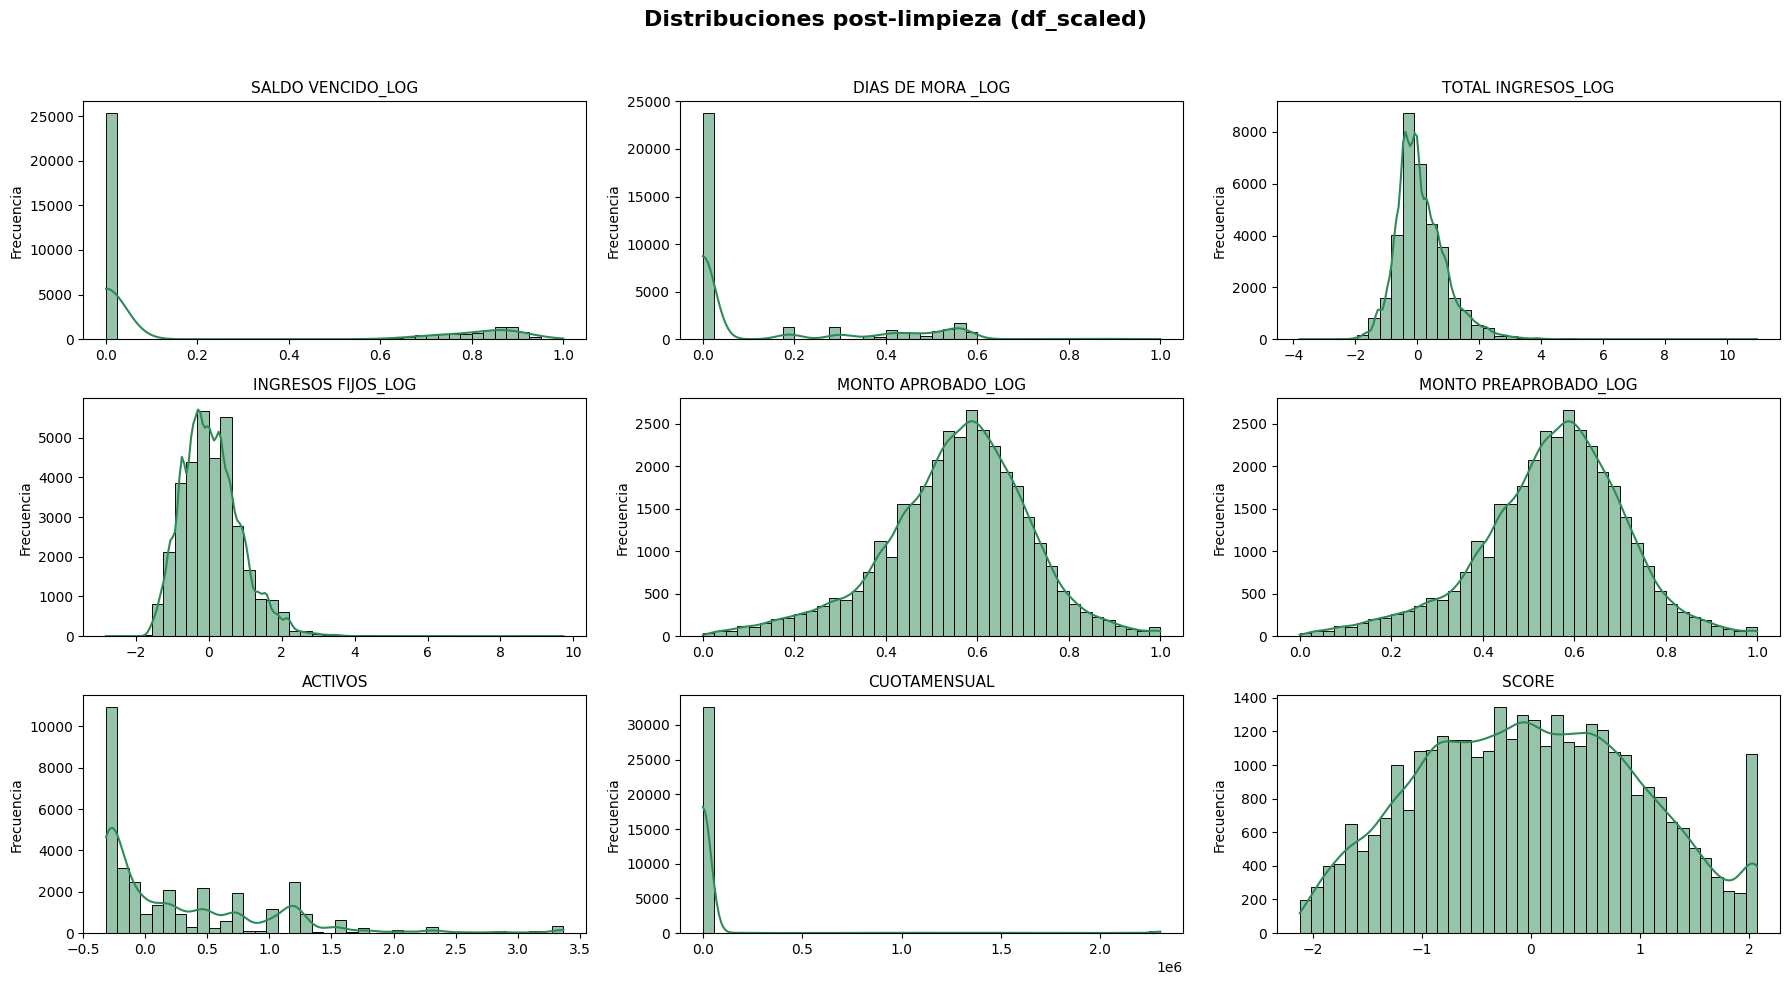

In [173]:
cols = [
    'SALDO VENCIDO_LOG', 'DIAS DE MORA _LOG', 'TOTAL INGRESOS_LOG', 
    'INGRESOS FIJOS_LOG', 'MONTO APROBADO_LOG', 'MONTO PREAPROBADO_LOG',
    'ACTIVOS', 'CUOTAMENSUAL', 'SCORE'
]

plt.figure(figsize=(18, 10))
plt.suptitle("Distribuciones post-limpieza (df_scaled)", fontsize=16, fontweight='bold')

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_scaled[col], bins=40, kde=True, color='seagreen')
    plt.title(col, fontsize=11)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 7. Codificación de Variables Categóricas
---

### 7.1 Label Encoding

In [176]:
label_cols = ['NIVEL ESTUDIOS', 'ESTADOCIVIL', 'GÉNERO']

le = LabelEncoder()
for col in label_cols:
    df_scaled[col + '_ENC'] = le.fit_transform(df_scaled[col])

df_scaled[label_cols + [c + '_ENC' for c in label_cols]].head()


,NIVEL ESTUDIOS,ESTADOCIVIL,GÉNERO,NIVEL ESTUDIOS_ENC,ESTADOCIVIL_ENC,GÉNERO_ENC
0,Universitario,Soltero (a),M,8,2,1
1,Técnico,Soltero (a),F,7,2,0
2,Técnico,Unión libre,F,7,3,0
3,Técnico,Unión libre,F,7,3,0
4,Universitario,Soltero (a),F,8,2,0


## 8. Reducción de Dimensionalidad & Selección de Características
---

#### 8.1 Selección de Variables Relevantes

##### A. Métodos Filter.
Evalúan la relación entre cada variable y el objetivo (por ejemplo DIAS DE MORA o FRANJA DE MORA) sin usar un modelo completo.

In [195]:

pd.set_option('display.max_columns', None)

X = df_scaled.select_dtypes(include=['float64', 'int64']).drop(columns=['DIAS DE MORA '])
X

,TRANSACTION ID,NO PERSONAS A CARGO,ANTIGUEDAD EN LA CIUDAD tiempo en residencia,ESTRATO,INGRESOS FIJOS,TOTAL INGRESOS,CUOTA DE CREDITOS,GASTOS DE SOSTENIMIENTO,TOTAL EGRESOS,ACTIVOS,PASIVOS,MONTO PREAPROBADO,NO CREDITO,MONTO APROBADO,PLAZO,MONTO DESEMBOLSO,IDENTIFICACION COMERCIAL,TASA,CUOTAMENSUAL,CODIGO CIIU,SCORE,SEGURO,AVAL,CODIGO CONFIRMACION CREDITO,PAGARE_ID,NUMERO CREDITO TESEO,SALDO CAPITAL,SALDO VENCIDO,EDAD,is_outlier_ml,SALDO VENCIDO_LOG,DIAS DE MORA _LOG,TOTAL INGRESOS_LOG,INGRESOS FIJOS_LOG,MONTO APROBADO_LOG,MONTO PREAPROBADO_LOG,NIVEL ESTUDIOS_ENC,ESTADOCIVIL_ENC,GÉNERO_ENC
0,2016918,-0.292162,-1.001090,1.596071,13000000.0,15500000.0,-0.002591,-0.66,-0.036021,1.526316,-0.003603,3.430311,3.398612e+16,3.430536,0.572917,3.430394,1101203671,0.619331,2.644853,8560.0,-0.498533,20986,69958,768277,40322901.0,768277,-0.101413,0.0,0.200236,1,0.0,0.0,1.568333,1.404903,0.871804,0.871804,8,2,1
1,2016914,-0.292162,1.453012,0.631589,19000000.0,19000000.0,-0.003110,-0.76,-0.036791,-0.315789,-0.003649,0.529250,3.310281e+17,0.529284,0.572917,0.529332,1045679685,0.619331,0.268090,4610.0,1.489928,7712,25710,50199432,40322628.0,50199432,1.573343,0.0,1.476431,1,0.0,0.0,1.849846,1.838373,0.650738,0.650738,7,2,0
2,2016836,-0.292162,0.634978,-0.332892,1500000.0,1500000.0,-0.003110,1.20,-0.029239,-0.236842,-0.003649,-0.743592,3.397612e+16,-0.743640,-1.012130,-0.743509,1026291187,0.619331,-0.568806,4799.0,-0.693279,1889,6295,26657430,40321155.0,26657430,0.308685,0.0,-1.304479,1,0.0,0.0,-1.660744,-1.061758,0.340013,0.340013,7,3,0
3,2016736,-0.292162,-0.455734,0.631589,4000000.0,7500000.0,0.001037,1.60,-0.024615,-0.315789,-0.003649,-0.321005,3.310011e+17,-0.321026,0.572917,-0.320923,31711538,0.619331,-0.428502,9609.0,0.577696,3822,12741,81389650,40318689.0,81389650,0.710501,0.0,-0.661597,1,0.0,0.0,0.564594,0.058590,0.495702,0.495702,7,3,0
4,2016576,-0.292162,1.180334,0.631589,16000000.0,16000000.0,-0.002073,-0.60,-0.035404,-0.315789,-0.003649,-0.540919,3.310281e+17,-0.540955,0.572917,-0.540837,1083558670,0.619331,-0.608669,4799.0,-1.995003,2816,9387,57688111,40310628.0,57688111,0.497963,0.0,-1.431563,1,0.0,0.0,1.612232,1.642078,0.428230,0.428230,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46321,2047579,15.557104,-0.183056,0.631589,4000000.0,4000000.0,-0.003110,0.80,-0.030780,-0.315789,-0.003649,-0.595900,3.310011e+17,-0.595939,-1.540479,-0.595817,1094925714,0.608345,-0.092923,4610.0,1.971668,2564,8548,72333267,41540784.0,72333267,0.455428,0.0,1.815767,1,0.0,0.0,-0.304571,0.058590,0.407563,0.407563,7,0,0
46322,2047954,-0.292162,-1.069259,0.631589,2800000.0,2800000.0,-0.003110,0.80,-0.030780,-0.315789,-0.003649,0.592359,3.310011e+17,0.592398,0.044568,0.592441,1094925714,0.608345,0.485486,10.0,-0.724028,8001,26671,58415933,41551403.0,58415933,1.636047,0.0,-0.183120,1,0.0,0.0,-0.797738,-0.348821,0.658855,0.658855,7,2,0
46323,2047975,-0.292162,-0.796581,-1.297374,15000000.0,15000000.0,-0.002695,0.00,-0.033555,-0.210526,-0.003612,0.248266,3.310261e+17,0.248282,0.044568,0.248348,1024487023,0.608345,0.170984,161.0,-0.232038,6427,21424,11031570,41552138.0,11031570,1.294165,0.0,0.621488,1,0.0,0.0,1.522996,1.568359,0.610466,0.610466,6,2,1
46325,2049352,-0.292162,-0.660242,0.631589,6000000.0,6000000.0,-0.002073,0.80,-0.030010,-0.315789,-0.003649,-0.485909,3.398612e+16,-0.485941,-1.540479,-0.485827,63536590,0.608345,0.107255,4799.0,0.259952,3068,10226,75143508,41593799.0,75143508,0.564711,0.0,-0.694516,1,0.0,0.0,0.256058,0.521730,0.447137,0.447137,7,2,1


In [196]:
X = df_scaled.select_dtypes(include=['float64', 'int64']).drop(columns=['DIAS DE MORA ', 'TRANSACTION ID', 'NO CREDITO', 'IDENTIFICACION COMERCIAL', 'CODIGO CIIU', 'CODIGO CONFIRMACION CREDITO', 'PAGARE_ID', 'NUMERO CREDITO TESEO', 'is_outlier_ml'])
y = df_scaled['DIAS DE MORA ']

selector = SelectKBest(score_func=f_regression, k = 15)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Variables seleccionadas:", selected_features.tolist())

Variables seleccionadas: ['ESTRATO', 'MONTO PREAPROBADO', 'MONTO APROBADO', 'PLAZO', 'MONTO DESEMBOLSO', 'TASA', 'SCORE', 'SEGURO', 'AVAL', 'SALDO CAPITAL', 'SALDO VENCIDO', 'SALDO VENCIDO_LOG', 'DIAS DE MORA _LOG', 'ESTADOCIVIL_ENC', 'GÉNERO_ENC']


##### B. Métodos Wrapper.
Evalúan la relación entre cada variable y el objetivo (por ejemplo DIAS DE MORA o FRANJA DE MORA) sin usar un modelo completo.

In [197]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print("Variables seleccionadas:", selected_features.tolist())

Variables seleccionadas: ['CUOTA DE CREDITOS', 'TOTAL EGRESOS', 'PASIVOS', 'MONTO PREAPROBADO', 'MONTO DESEMBOLSO', 'TASA', 'SALDO VENCIDO_LOG', 'DIAS DE MORA _LOG', 'MONTO APROBADO_LOG', 'MONTO PREAPROBADO_LOG']


#### C. Métodos Embedded

In [200]:
lasso = LassoCV(cv = 5).fit(X, y)

# Importancia de los coeficientes
importance = lasso.coef_
selected = X.columns[importance > 0]
print("Variables retenidas por Lasso:", selected.tolist())
print(importance)
print(lasso.score(X, y))

Variables retenidas por Lasso: ['INGRESOS FIJOS']
[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  5.10658812e-24
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
0.0


### 8.2 Extracción de características (PCA, t-SNE)

In [242]:
features_pca = [
    'SALDO VENCIDO_LOG', 'DIAS DE MORA _LOG', 'SCORE', 'TOTAL INGRESOS_LOG', 'INGRESOS FIJOS_LOG', 'EDAD',
    'ACTIVOS', 'SALDO CAPITAL', 'ESTRATO', 'PLAZO', 'TASA', 'ANTIGUEDAD EN LA CIUDAD tiempo en residencia',
    'PASIVOS', 'AVAL', 'SEGURO', 'CUOTA DE CREDITOS', 'TOTAL EGRESOS', 'GASTOS DE SOSTENIMIENTO', 'CUOTAMENSUAL'
]

X = df_scaled[features_pca].copy()

#### a) PCA — Principal Component Analysis

In [244]:
def print_b(text):
    bold_letters = {
        **{chr(i): chr(0x1D400 + i - ord('A')) for i in range(ord('A'), ord('Z')+1)},
        **{chr(i): chr(0x1D41A + i - ord('a')) for i in range(ord('a'), ord('z')+1)},
        **{chr(i): chr(0x1D7CE + i - ord('0')) for i in range(ord('0'), ord('9')+1)}
    }

    bold_text = ''.join(bold_letters.get(c, c) for c in text)
    print(bold_text)

def table_proportion_variance_PC(pca, feature_names=None):
    eigenvalues = pca.explained_variance_
    proportion_variance = eigenvalues / np.sum(eigenvalues)
    cumulated_proportion = np.cumsum(proportion_variance)

    table = pd.DataFrame({
        "Eigenvalue": eigenvalues,
        "Proportion of variance": proportion_variance,
        "Cumulated proportion": cumulated_proportion
    })

    return table

def print_eigenvectors(pca, feature_names=None):
    eigenvectors = pca.components_
    n_components = eigenvectors.shape[0]
    n_features = eigenvectors.shape[1]

    if feature_names is None:
        feature_names = [f"x{j+1}" for j in range(n_features)]

    print_b("\nEigenvectores expresados como combinaciones lineales:\n")
    for i, component in enumerate(eigenvectors):
        terms = []
        for coef, name in zip(component, feature_names):
            sign = "+" if coef >= 0 else "-"
            terms.append(f"{sign} {abs(coef):.4f}·{name}")
        equation = " ".join(terms)
        print(f"\n y{i+1} = {equation}")
    print("")

In [245]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled = X_scaled.set_index(X.index)

pca = PCA(n_components = 2)
pca.fit(X_scaled)

tabla_1 = table_proportion_variance_PC(pca, feature_names=X_scaled.columns)
print_b("Tabla de Eigenvalues, Proportion of variance y Cumulated Proportion\n")
print(tabla_1, end = "\n\n\n")
print_eigenvectors(pca)

pc1 = pca.components_[0]
tabla_pc1 = pd.DataFrame({
    'Variable': X_scaled.columns,
    'Peso en PC1': pc1.round(4)
})

tabla_pc1['Peso absoluto'] = tabla_pc1['Peso en PC1'].abs()
tabla_pc1 = tabla_pc1.sort_values(by='Peso absoluto', ascending=False)
print(tabla_pc1[['Variable', 'Peso en PC1']])
print("\n\n")
pc2 = pca.components_[1]
tabla_pc2 = pd.DataFrame({
    'Variable': X_scaled.columns,
    'Peso en PC2': pc2.round(4)
})

tabla_pc2['Peso absoluto'] = tabla_pc2['Peso en PC2'].abs()
tabla_pc2 = tabla_pc2.sort_values(by='Peso absoluto', ascending=False)
print(tabla_pc2[['Variable', 'Peso en PC2']])

𝐓𝐚𝐛𝐥𝐚 𝐝𝐞 𝐄𝐢𝐠𝐞𝐧𝐯𝐚𝐥𝐮𝐞𝐬, 𝐏𝐫𝐨𝐩𝐨𝐫𝐭𝐢𝐨𝐧 𝐨𝐟 𝐯𝐚𝐫𝐢𝐚𝐧𝐜𝐞 𝐲 𝐂𝐮𝐦𝐮𝐥𝐚𝐭𝐞𝐝 𝐏𝐫𝐨𝐩𝐨𝐫𝐭𝐢𝐨𝐧

   Eigenvalue  Proportion of variance  Cumulated proportion
0    3.440273                0.582804              0.582804
1    2.462698                0.417196              1.000000



𝐄𝐢𝐠𝐞𝐧𝐯𝐞𝐜𝐭𝐨𝐫𝐞𝐬 𝐞𝐱𝐩𝐫𝐞𝐬𝐚𝐝𝐨𝐬 𝐜𝐨𝐦𝐨 𝐜𝐨𝐦𝐛𝐢𝐧𝐚𝐜𝐢𝐨𝐧𝐞𝐬 𝐥𝐢𝐧𝐞𝐚𝐥𝐞𝐬:


 y1 = + 0.1880·x1 + 0.1920·x2 + 0.0335·x3 + 0.3561·x4 + 0.3763·x5 + 0.1390·x6 + 0.1341·x7 + 0.3815·x8 + 0.1625·x9 + 0.0805·x10 - 0.0388·x11 + 0.1119·x12 - 0.2261·x13 + 0.4399·x14 + 0.4203·x15 - 0.0037·x16 - 0.0037·x17 - 0.0035·x18 + 0.0844·x19

 y2 = + 0.4302·x1 + 0.4086·x2 - 0.3539·x3 - 0.2725·x4 - 0.2618·x5 - 0.2714·x6 - 0.2467·x7 + 0.2758·x8 - 0.1991·x9 + 0.2533·x10 + 0.1823·x11 - 0.1458·x12 + 0.0395·x13 + 0.0591·x14 + 0.0710·x15 - 0.0143·x16 - 0.0143·x17 - 0.0033·x18 + 0.0232·x19

                                        Variable  Peso en PC1
13                                          AVAL       0.4399
14                                        SEGURO       0.4203
7               

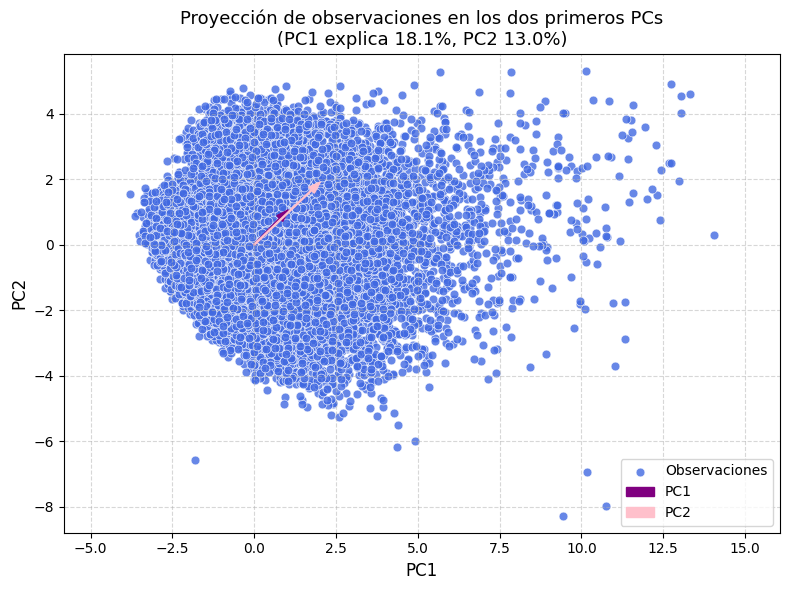

In [247]:
Z = pca.transform(X_scaled)
expl = pca.explained_variance_ratio_
mu = pca.mean_
v = pca.components_
s = np.sqrt(pca.explained_variance_)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Z[:, 0], y=Z[:, 1],
                s=40, color='royalblue', alpha=0.8, edgecolor='white')

plt.title(f'Proyección de observaciones en los dos primeros PCs\n'
          f'(PC1 explica {expl[0]*100:.1f}%, PC2 {expl[1]*100:.1f}%)',
          fontsize=13)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

scale_factor = 3

for i in range(2):
    dx, dy = v[i, 0] * scale_factor * s[i], v[i, 1] * scale_factor * s[i]
    plt.arrow(0, 0, dx, dy,  # ancladas en el origen del espacio de PCs
              width=0.03, head_width=0.25,
              color='purple' if i == 0 else 'pink',
              length_includes_head=True,
              label=f"PC{i+1}")

plt.legend(['Observaciones', 'PC1', 'PC2'], loc='best')
plt.axis('equal') # [xmin, xmax, ymin, ymax] 'equal'
plt.tight_layout()
plt.show()

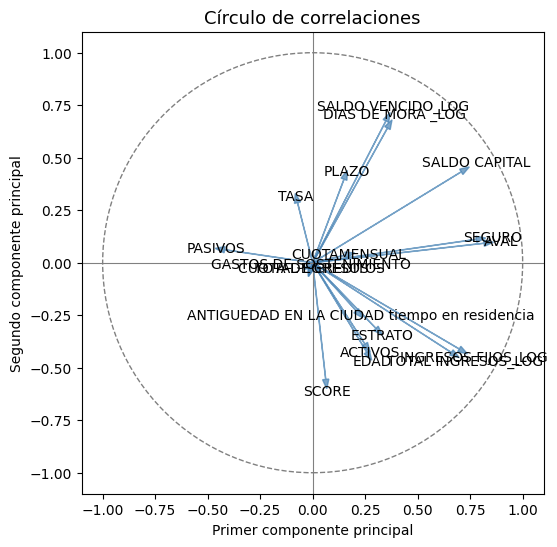

In [248]:
# Círculo de correlaciones
# Correlaciones entre variables originales y los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots(figsize=(6,6))
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(circle)

for i, feature in enumerate(X_scaled.columns):
    ax.arrow(0, 0, loadings[i,0], loadings[i,1],
             color='steelblue', alpha=0.7, head_width=0.03)
    ax.text(loadings[i,0]*1.1, loadings[i,1]*1.1, feature,
            color='black', ha='center', va='center', fontsize=10)

ax.set_title('Círculo de correlaciones', fontsize=13)
ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segundo componente principal')
ax.axhline(0, color='gray', linewidth=0.8)
ax.axvline(0, color='gray', linewidth=0.8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')
plt.show()

[0.1810617  0.3106736  0.41595741 0.50038006 0.57720365 0.64177342
 0.69636957 0.74900647 0.7961609  0.83969115]


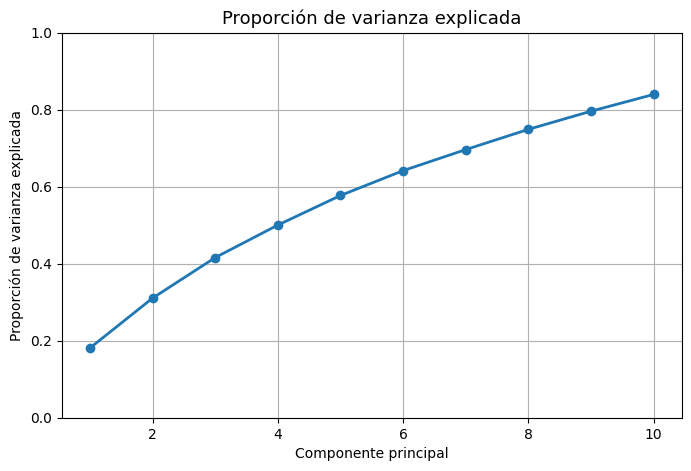

In [249]:
# Aplicamos PCA
pca10 = PCA(n_components=10)
pca10.fit(X_scaled)

cum_10 = np.cumsum(pca10.explained_variance_ratio_)
expl_10 = pca10.explained_variance_ratio_

# 1️ Scree plot: Varianza explicada
print(cum_10)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_10)+1), cum_10, 'o-', linewidth=2)
plt.title('Proporción de varianza explicada', fontsize=13)
plt.xlabel('Componente principal')
plt.ylabel('Proporción de varianza explicada')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


#### b) t-SNE - t-Distributed Stochastic Neighbor Embedding

### 8.3 Random Forest

In [256]:
df_scaled.columns

Index(['TRANSACTION ID', 'FECHA NACIMIENTO', 'FECHA EXP DOC', 'NIVEL ESTUDIOS',
       'ESTADOCIVIL', 'PROFESION', 'GÉNERO', 'TIPO VIVIENDA',
       'NO PERSONAS A CARGO', 'ANTIGUEDAD EN LA CIUDAD tiempo en residencia',
       'ESTRATO', 'CIUDAD', 'DEPARTAMENTO', 'DIRECCION', 'BARRIO',
       'ACTIVIDAD ECONÓMICA', 'EMPRESA', 'TIPO CONTRATO', 'OCUPACIÓN',
       'TIEMPO ACTIVIDAD', 'INGRESOS FIJOS', 'TOTAL INGRESOS',
       'CUOTA DE CREDITOS', 'GASTOS DE SOSTENIMIENTO', 'TOTAL EGRESOS',
       'ACTIVOS', 'PASIVOS', 'FECHA SOLICITUD', 'MONTO PREAPROBADO',
       'NO CREDITO', 'MONTO APROBADO', 'PLAZO', 'FECHA APROBACIÓN',
       'FECHA DESEMBOLSO', 'MONTO DESEMBOLSO', 'COMERCIAL', 'CLINICA',
       'IDENTIFICACION COMERCIAL', 'TASA', 'CUOTAMENSUAL', 'LUGAR NACIMIENTO',
       'CODIGO CIIU', 'OPERACION MONEDA EXTRAGERA', 'FCREACION DENTICUOTAS',
       'INCIDENCIAFORMALIZACION', 'SCORE', 'SEGURO', 'AVAL',
       'CODIGO CONFIRMACION CREDITO', 'PAGARE_ID', 'NUMERO CREDITO TESEO',
       

In [258]:
# 'DIAS_DE_MORA_LOG'

selected_vars = [
    'SALDO VENCIDO_LOG', 'SCORE', 'ESTADOCIVIL_ENC', 'GÉNERO_ENC', 'NIVEL ESTUDIOS_ENC',
    'TOTAL INGRESOS_LOG', 'INGRESOS FIJOS_LOG', 'PASIVOS', 'ACTIVOS',
    'SALDO CAPITAL', 'AVAL', 'SEGURO', 'PLAZO', 'EDAD', 'ESTRATO'
]

df_reduced = df_scaled[selected_vars + ['FRANJA DE MORA']].copy()

df_reduced['FRANJA DE MORA'] = df_reduced['FRANJA DE MORA'].astype('category')
df_reduced.head()

,SALDO VENCIDO_LOG,SCORE,ESTADOCIVIL_ENC,GÉNERO_ENC,NIVEL ESTUDIOS_ENC,TOTAL INGRESOS_LOG,INGRESOS FIJOS_LOG,PASIVOS,ACTIVOS,SALDO CAPITAL,AVAL,SEGURO,PLAZO,EDAD,ESTRATO,FRANJA DE MORA
0,0.0,-0.498533,2,1,8,1.568333,1.404903,-0.003603,1.526316,-0.101413,69958,20986,0.572917,0.200236,1.596071,01. Al dia
1,0.0,1.489928,2,0,7,1.849846,1.838373,-0.003649,-0.315789,1.573343,25710,7712,0.572917,1.476431,0.631589,01. Al dia
2,0.0,-0.693279,3,0,7,-1.660744,-1.061758,-0.003649,-0.236842,0.308685,6295,1889,-1.012130,-1.304479,-0.332892,01. Al dia
3,0.0,0.577696,3,0,7,0.564594,0.058590,-0.003649,-0.315789,0.710501,12741,3822,0.572917,-0.661597,0.631589,01. Al dia
4,0.0,-1.995003,2,0,8,1.612232,1.642078,-0.003649,-0.315789,0.497963,9387,2816,0.572917,-1.431563,0.631589,01. Al dia


In [259]:
X = df_reduced[selected_vars]
y = df_reduced['FRANJA DE MORA']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [261]:
rf = RandomForestClassifier(
    n_estimators=200,       # número de árboles
    max_depth=None,         # sin límite de profundidad
    random_state=42,
    class_weight='balanced' # útil si hay clases desbalanceadas
)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.8224531615925058

Matriz de confusión:


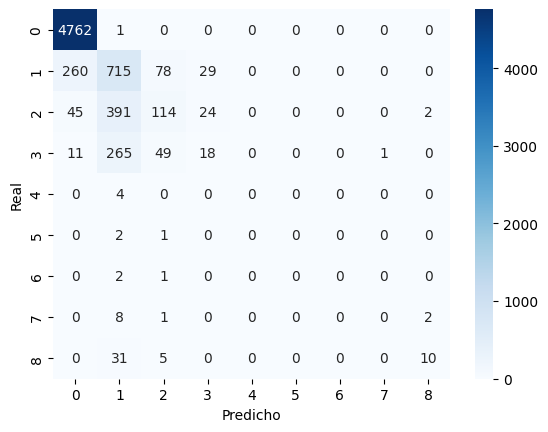


Reporte de clasificación:
               precision    recall  f1-score   support

   01. Al dia       0.94      1.00      0.97      4763
   02. 1 a 30       0.50      0.66      0.57      1082
  03. 31 a 60       0.46      0.20      0.28       576
  04. 61 a 90       0.25      0.05      0.09       344
 05. 91 a 120       0.00      0.00      0.00         4
06. 121 a 150       0.00      0.00      0.00         3
07. 151 a 180       0.00      0.00      0.00         3
08. 181 a 360       0.00      0.00      0.00        11
    09. > 360       0.71      0.22      0.33        46

     accuracy                           0.82      6832
    macro avg       0.32      0.24      0.25      6832
 weighted avg       0.79      0.82      0.80      6832



D:\CodingTools\Python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\CodingTools\Python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\CodingTools\Python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [262]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

In [263]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor accuracy:", grid_search.best_score_)


Mejores parámetros: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Mejor accuracy: 0.8190967647489386


## 9. Integración & Reconciliación de Fuentes

In [264]:
df_scaled.to_csv("df_scaled.csv", index=False, encoding="utf-8")

df_scaled.to_excel("df_scaled.xlsx", index=False)


## 10. Bibliografía Consultada:



- https://www.betterevaluation.org/sites/default/files/data_cleaning.pdf

- https://datasciencehorizons.com/wp-content/uploads/2023/06/Data_Cleaning_and_Preprocessing_for_Data_Science_Beginners_Data_Science_Horizons_2023_Data_Science_Horizons_Final_2023.pdf

- https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/ch01.html

- https://pzs.dstu.dp.ua/DataMining/preprocessing/bibl/cleaning.pdf